# Check Data

In [4]:
# Check if all files in the data folder
import os
import re
import pandas as pd

data_folder = '..\\data\\raw'
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for year in years:
    for month in months:
        filename = f'{month}_{year}.csv'
        if not os.path.exists(os.path.join(data_folder, filename)):
            print(f'{filename} not found in {year}')




November_2024.csv not found in 2024
December_2024.csv not found in 2024


# Loading Data


Date  Hour  Bourke Street Mall (North)  Bourke Street Mall (South)  \
0    01/01/2024     0                         984                         703   
1    01/01/2024     1                         757                         473   
2    01/01/2024     2                         268                         220   
3    01/01/2024     3                         143                          97   
4    01/01/2024     4                          87                          36   
..          ...   ...                         ...                         ...   
739  31/01/2024    19                        1022                         340   
740  31/01/2024    20                         603                         302   
741  31/01/2024    21                         438                         175   
742  31/01/2024    22                         210                         139   
743  31/01/2024    23                          83                          45   

     Melbourne Central  Town Hall (West)  Princes Bridge  \
0                 3301              3304               0   
1                 4371              2964               0   
2                 1967              1360               0   
3                 1020               563               0   
4                  543               294               0   
..                 ...               ...             ...   
739               1712              1469            1436   
740               1474              1023            1339   
741               1211               943            1132   
742                778               601             661   
743                470               239             278   

     Flinders Street Station Underpass  Birrarung Marr  Webb Bridge  ...  \
0                                 1094               0         1430  ...   
1                                  768               0          337  ...   
2                                 2062               0           56  ...   
3                                 1567               0           13  ...   
4                                  826               0            7  ...   
..                                 ...             ...          ...  ...   
739                               1356             167          204  ...   
740                               1200              89          290  ...   
741                               1039              67          123  ...   
742                                805              55           64  ...   
743                                392              18           15  ...   

     William St - Little Lonsdale St (West)  La Trobe St - William St (South)  \
0                                      2126                              2157   
1                                       652                               541   
2                                       235                               198   
3                                       144                               136   
4                                        69                                48   
..                                      ...                               ...   
739                                     373                               219   
740                                     270                               210   
741                                     211                               172   
742                                     180                               116   
743                                     113                                84   

     114 Flinders St  Birrarung Marr East - Batman Ave Bridge Entry  \
0               1580                                            146   
1                929                                             16   
2                278                                              0   
3                 89                                              4   
4                 28                                              0   
..   

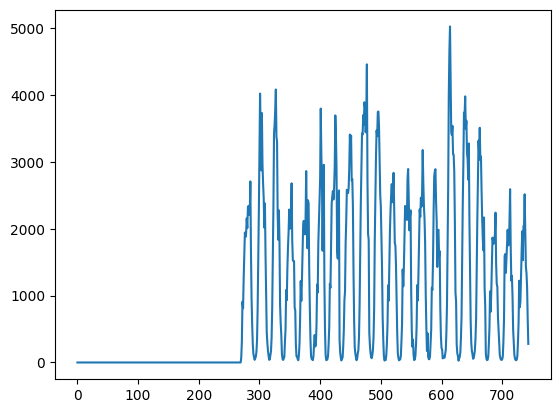

In [5]:
df_test = pd.read_csv('../data/raw/January_2024.csv')
df_test

# Plot for Princes Bridge	
df_test['Princes Bridge'].plot()
df_test

In [6]:
import os
import pandas as pd

# Initialize a dictionary to store data information
file_data = {}

data_folder = '..\\data\\raw'
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Dictionary to store the data
all_data = []
column_appearance_count = {}
missing_data_summary = {}

# Load all datasets
for year in years:
    for month in months:
        filename = f'{month}_{year}.csv'
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                all_data.append((filename, year, df))
                
                # Count column appearances
                for col in df.columns:
                    column_appearance_count[col] = column_appearance_count.get(col, 0) + 1
                
                # Track missing data per year per column
                if year not in missing_data_summary:
                    missing_data_summary[year] = {}
                
                for col in df.columns:
                    missing_data_summary[year][col] = missing_data_summary[year].get(col, 0) + df[col].isna().sum()
            
            except Exception as e:
                print(f"Error loading {filename}: {e}")
        else:
            print(f'{filename} not found in {year}')

# Summary of all columns and their appearance counts
columns_df = pd.DataFrame({
    "Column Name": column_appearance_count.keys(),
    "Appearance Count": column_appearance_count.values()
})

# Summary of missing data per year
missing_data_avg = {
    col: {year: missing_data_summary[year].get(col, 0) / 12 for year in missing_data_summary}
    for col in column_appearance_count
}

# Create DataFrame for missing data averages
missing_data_df = pd.DataFrame(missing_data_avg).T
missing_data_df.columns = [f"Avg Missing {year}" for year in missing_data_summary.keys()]

# Combine summaries
columns_summary = pd.concat([columns_df.set_index("Column Name"), missing_data_df], axis=1)

columns_summary.sort_values("Appearance Count", ascending=False, inplace=True)

columns_summary.head(20)

November_2024.csv not found in 2024
December_2024.csv not found in 2024


Appearance Count  Avg Missing 2013  \
Date                                          142          0.000000   
Victoria Point                                142          0.083333   
Spencer St-Collins St (South)                 142        486.083333   
Spencer St-Collins St (North)                 142        486.083333   
Flinders St-Elizabeth St (East)               142        486.000000   
Birrarung Marr                                142          0.000000   
Sandridge Bridge                              142          0.000000   
Princes Bridge                                142          0.000000   
Webb Bridge                                   142          0.000000   
Waterfront City                               142          0.000000   
QV Market-Peel St                             142        486.000000   
New Quay                                      142        244.000000   
Southern Cross Station                        142          0.083333   
Hour                                          142          0.000000   
Bourke Street Mall (South)                    142          0.083333   
Bourke Street Mall (North)                    142          0.083333   
Town Hall (West)                              142          0.083333   
Melbourne Central                             142          0.083333   
Flagstaff Station                             142          0.083333   
Collins Place (North)                         142          0.083333   

                                 Avg Missing 2014  Avg Missing 2015  \
Date                                          0.0               0.0   
Victoria Point                                0.0               0.0   
Spencer St-Collins St (South)                 0.0               0.0   
Spencer St-Collins St (North)                 0.0               0.0   
Flinders St-Elizabeth St (East)               0.0               0.0   
Birrarung Marr                               46.5               0.0   
Sandridge Bridge                              0.0               0.0   
Princes Bridge                                0.0               0.0   
Webb Bridge                                   0.0               0.0   
Waterfront City                               0.0               0.0   
QV Market-Peel St                             0.0               0.0   
New Quay                                      0.0               0.0   
Southern Cross Station                        0.0               0.0   
Hour                                          0.0               0.0   
Bourke Street Mall (South)                    0.0               0.0   
Bourke Street Mall (North)                    0.0               0.0   
Town Hall (West)                              0.0               0.0   
Melbourne Central                             0.0               0.0   
Flagstaff Station                             0.0               0.0   
Collins Place (North)                         0.0               0.0   

                                 Avg Missing 2016  Avg Missing 2017  \
Date                                          0.0               0.0   
Victoria Point                                0.0               0.0   
Spencer St-Collins St (South)                 0.0               0.0   
Spencer St-Collins St (North)                 0.0               0.0   
Flinders St-Elizabeth St (East)               0.0               0.0   
Birrarung Marr                                0.0               0.0   
Sandridge Bridge                              0.0               0.0   
Princes Bridge                                0.0               0.0   
Webb Bridge                                   0.0               0.0   
Waterfront City                               0.0               0.0   
QV Market-Peel St                             0.0               0.0   
New Quay                                      0.0               0.0   
Southern Cross Station                        0.0               0.0   
Hour                                          0.0      

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
data_folder = '..\\data\\raw'
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']



## Checking for Missing Data for seleceted date range

### Checking for NA

In [8]:
import os
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
data_folder = '..\\data\\raw'
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = ['2017', '2018', '2019', '2022', '2023', '2024']

# Initialize a dictionary to store data information
file_data = {}

# Dictionary to store the data
all_data = []
column_appearance_count = {}
missing_data_summary = {}

# Load all datasets
for year in years:
    for month in months:
        filename = f'{month}_{year}.csv'
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                all_data.append((filename, year, df))
                
                # Count column appearances
                for col in df.columns:
                    column_appearance_count[col] = column_appearance_count.get(col, 0) + 1
                
                # Track missing data per year per column
                if year not in missing_data_summary:
                    missing_data_summary[year] = {}
                
                for col in df.columns:
                    missing_data_summary[year][col] = missing_data_summary[year].get(col, 0) + df[col].isna().sum()
            
            except Exception as e:
                print(f"Error loading {filename}: {e}")
        else:
            print(f'{filename} not found in {year}')

# Summary of all columns and their appearance counts
columns_df = pd.DataFrame({
    "Column Name": column_appearance_count.keys(),
    "Appearance Count": column_appearance_count.values()
})



# Summary of missing data per year
missing_data_avg = {
    col: {year: missing_data_summary[year].get(col, 0) / 12 for year in missing_data_summary}
    for col in column_appearance_count
}

# Create DataFrame for missing data averages
missing_data_df = pd.DataFrame(missing_data_avg).T
missing_data_df.columns = [f"Avg Missing {year}" for year in missing_data_summary.keys()]

# Combine summaries
columns_summary = pd.concat([columns_df.set_index("Column Name"), missing_data_df], axis=1)

columns_summary.sort_values("Appearance Count", ascending=False, inplace=True)

columns_summary.head(5)

November_2024.csv not found in 2024
December_2024.csv not found in 2024


Appearance Count  Avg Missing 2017  \
Date                                         70               0.0   
Lygon St (West)                              70               0.0   
Spencer St-Collins St (North)                70               0.0   
Spencer St-Collins St (South)                70               0.0   
Bourke St-Russell St (West)                  70               0.0   

                               Avg Missing 2018  Avg Missing 2019  \
Date                                        0.0               0.0   
Lygon St (West)                             0.0               0.0   
Spencer St-Collins St (North)               0.0               0.0   
Spencer St-Collins St (South)               0.0               0.0   
Bourke St-Russell St (West)                 0.0               0.0   

                               Avg Missing 2022  Avg Missing 2023  \
Date                                        0.0               0.0   
Lygon St (West)                             0.0               0.0   
Spencer St-Collins St (North)               0.0               0.0   
Spencer St-Collins St (South)               0.0               0.0   
Bourke St-Russell St (West)                 0.0               0.0   

                               Avg Missing 2024  
Date                                        0.0  
Lygon St (West)                             0.0  
Spencer St-Collins St (North)               0.0  
Spencer St-Collins St (South)               0.0  
Bourke St-Russell St (West)                 0.0

### Select only when apearing in all data

In [9]:
# Give all keays with apearance coun 70, except for date and Hour:
list_70 = columns_summary[(columns_summary['Appearance Count'] == 70) & (~columns_summary.index.isin(['Date', 'Hour']))].index.tolist()

filtered_columns_summary = columns_summary.loc[list_70]
filtered_columns_summary.sort_values("Appearance Count", ascending=False, inplace=True)
filtered_columns_summary.tail(5)

Appearance Count  Avg Missing 2017  \
Chinatown-Lt Bourke St (South)                70               0.0   
Chinatown-Swanston St (North)                 70               0.0   
Bourke St-Russell St (West)                   70               0.0   
Spencer St-Collins St (South)                 70               0.0   
Princes Bridge                                70               0.0   

                                Avg Missing 2018  Avg Missing 2019  \
Chinatown-Lt Bourke St (South)               0.0               0.0   
Chinatown-Swanston St (North)                0.0               0.0   
Bourke St-Russell St (West)                  0.0               0.0   
Spencer St-Collins St (South)                0.0               0.0   
Princes Bridge                               0.0               0.0   

                                Avg Missing 2022  Avg Missing 2023  \
Chinatown-Lt Bourke St (South)               0.0               0.0   
Chinatown-Swanston St (North)                0.0               0.0   
Bourke St-Russell St (West)                  0.0               0.0   
Spencer St-Collins St (South)                0.0               0.0   
Princes Bridge                               0.0               0.0   

                                Avg Missing 2024  
Chinatown-Lt Bourke St (South)               0.0  
Chinatown-Swanston St (North)                0.0  
Bourke St-Russell St (West)                  0.0  
Spencer St-Collins St (South)                0.0  
Princes Bridge                               0.0

### Checking for zero values

In [10]:
# Initialize dictionaries for data collection
all_data = []
column_appearance_count = {}
zero_value_summary = {}

# Load all datasets and analyze zero values
for year in years:
    for month in months:
        filename = f'{month}_{year}.csv'
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                all_data.append((filename, year, df))
                
                # Count column appearances
                for col in df.columns:
                    column_appearance_count[col] = column_appearance_count.get(col, 0) + 1
                
                # Track zero values per year per column
                if year not in zero_value_summary:
                    zero_value_summary[year] = {}
                
                for col in df.columns:
                    zero_value_summary[year][col] = zero_value_summary[year].get(col, 0) + (df[col] == 0).sum()
            
            except Exception as e:
                print(f"Error loading {filename}: {e}")
        else:
            print(f'{filename} not found in {year}')

# Summary of all columns and their appearance counts
columns_df = pd.DataFrame({
    "Column Name": column_appearance_count.keys(),
    "Appearance Count": column_appearance_count.values()
})

# Summary of zero values per year
zero_values_avg = {
    col: {year: zero_value_summary[year].get(col, 0) for year in zero_value_summary}
    for col in column_appearance_count
}

# Create DataFrame for zero values averages
zero_values_df = pd.DataFrame(zero_values_avg).T
zero_values_df.columns = [f"Zeros {year}" for year in zero_value_summary.keys()]

# Combine summaries
columns_summary_with_zeros = pd.concat([columns_df.set_index("Column Name"), zero_values_df], axis=1)

filtered_columns_summary_with_zeros = columns_summary_with_zeros.loc[list_70]


# Create a last column with the sum of all ueros
filtered_columns_summary_with_zeros['Total Zeros'] = filtered_columns_summary_with_zeros.sum(axis=1) - 70
filtered_columns_summary_with_zeros

filtered_columns_summary_with_zeros.sort_values("Total Zeros", ascending=True, inplace=True)

filtered_columns_summary_with_zeros

November_2024.csv not found in 2024
December_2024.csv not found in 2024


Appearance Count  Zeros 2017  Zeros 2018  \
Collins Place (South)                          70           0           0   
Flinders St-Spring St (West)                   70          45           0   
Chinatown-Lt Bourke St (South)                 70           3           0   
Chinatown-Swanston St (North)                  70           0           0   
Lygon St (West)                                70          61           0   
Bourke Street Mall (South)                     70           6           0   
Southbank                                      70           0           0   
Spencer St-Collins St (North)                  70           0           0   
Spencer St-Collins St (South)                  70         320           0   
Lonsdale St (South)                            70         337           0   
State Library                                  70         268           0   
New Quay                                       70          49           0   
Melbourne Central                              70         558           0   
Bourke Street Mall (North)                     70           7           0   
Webb Bridge                                    70         109           0   
Victoria Point                                 70          51           0   
Monash Rd-Swanston St (West)                   70          98           0   
Southern Cross Station                         70          15           0   
Sandridge Bridge                               70         693           0   
City Square                                    70        1389           0   
QV Market-Peel St                              70          21           0   
Bourke St-Russell St (West)                    70           0           0   
Flinders St-Elizabeth St (East)                70        1620           0   
Princes Bridge                                 70         886           0   
Collins Place (North)                          70          43           0   
Flagstaff Station                              70        2189           0   
Alfred Place                                   70         768           0   
Tin Alley-Swanston St (West)                   70         129           0   
Waterfront City                                70        1274           0   
Town Hall (West)                               70        3636           0   
Flinders St-Swanston St (West)                 70        4884           0   
Birrarung Marr                                 70         372           0   
Grattan St-Swanston St (West)                  70          66           0   

                                 Zeros 2019  Zeros 2022  Zeros 2023  \
Collins Place (South)                     0           0           3   
Flinders St-Spring St (West)              0           0           0   
Chinatown-Lt Bourke St (South)            0           0           3   
Chinatown-Swanston St (North)             0           0          72   
Lygon St (West)                           0           0          22   
Bourke Street Mall (South)                0           0         107   
Southbank                                 0           0         119   
Spencer St-Collins St (North)             0           0           3   
Spencer St-Collins St (South)             0           0          10   
Lonsdale St (South)                       0           0           1   
State Library                             0           0          84   
New Quay                                  0           0          47   
Melbourne Central                         0           0           1   
Bourke Street Mall (North)                0           0           2   
Webb Bridge                               0           0         243   
Victoria Point                            0           0         265   
Monash Rd-Swanston St (West)              0           0         206   
Southern Cross Station                    0           0         433   
Sandridge Bridge                          0           0         1

November_2024.csv not found
December_2024.csv not found
Lygon St (West)


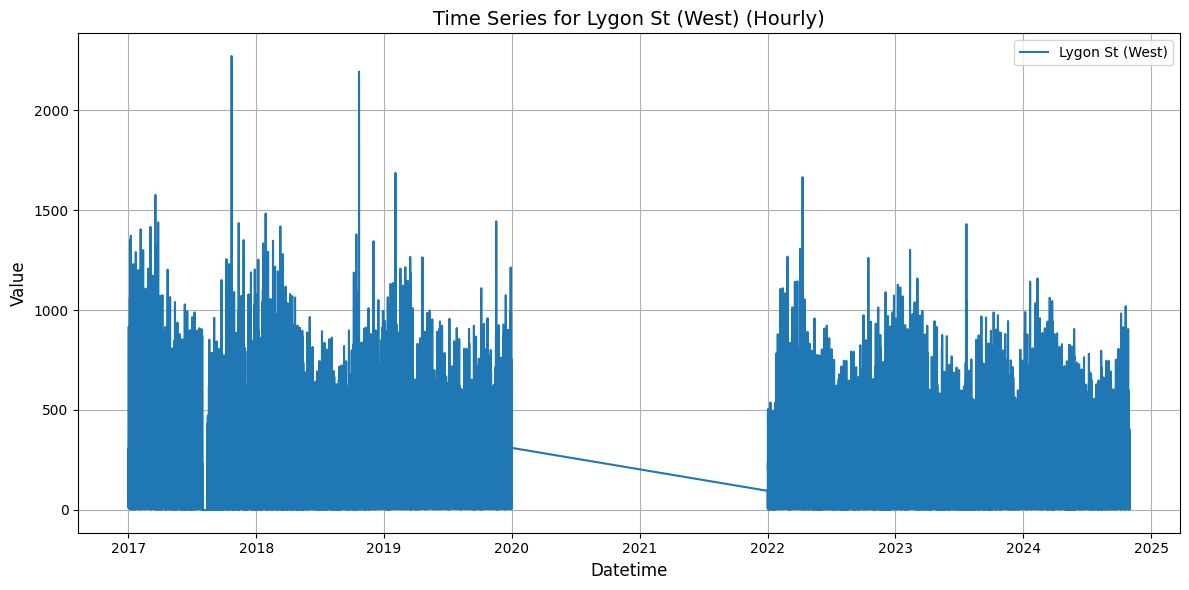

Spencer St-Collins St (North)


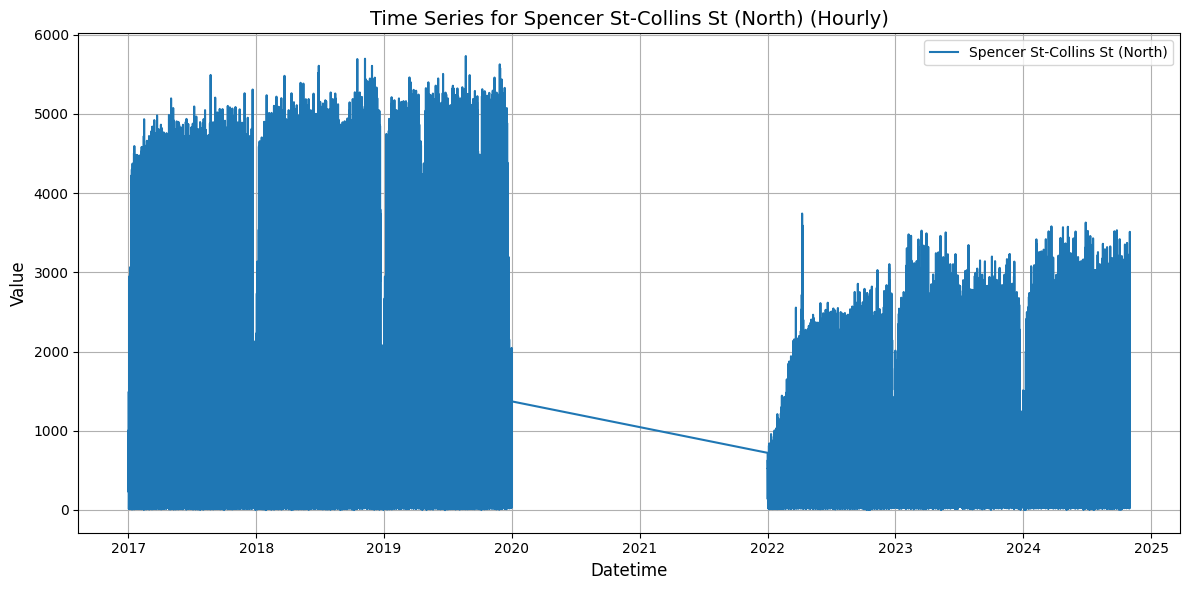

Spencer St-Collins St (South)


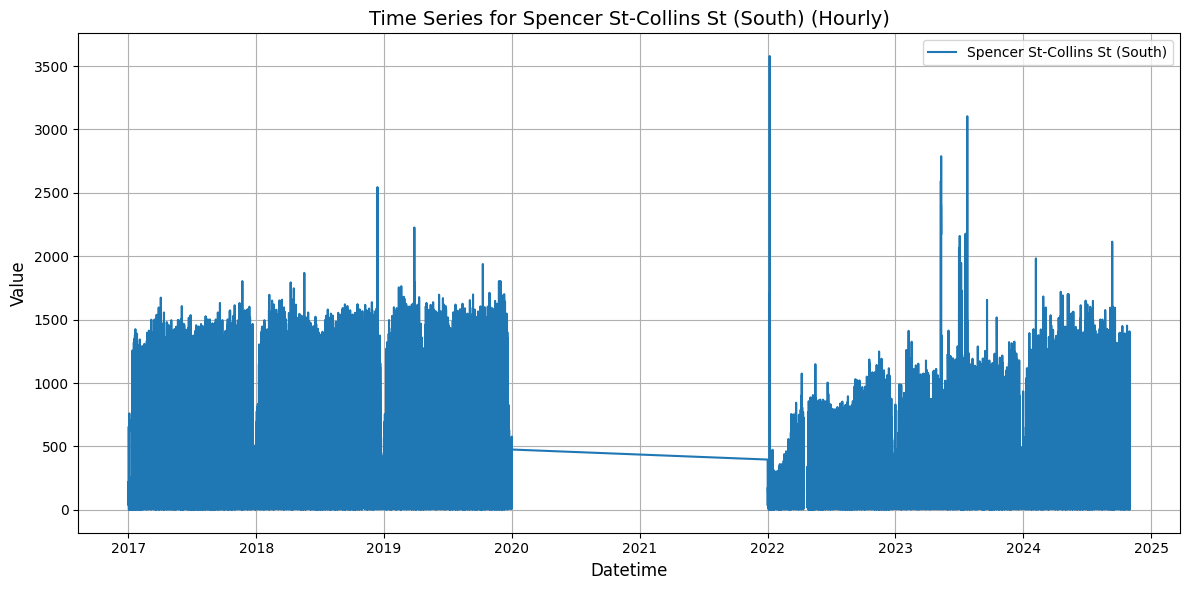

Bourke St-Russell St (West)


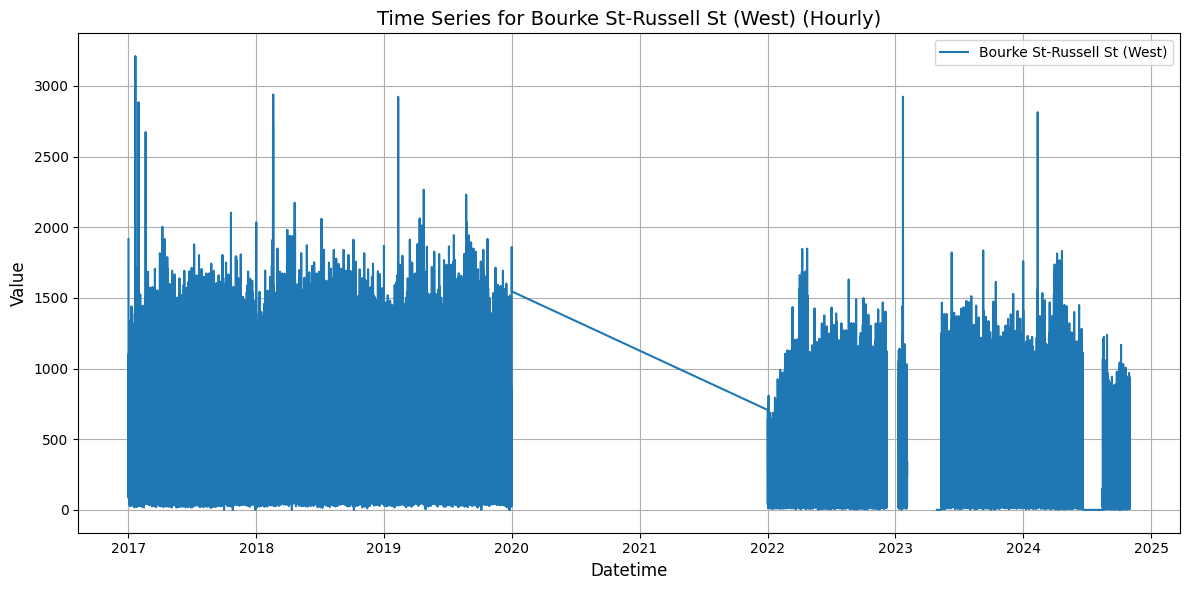

Chinatown-Swanston St (North)


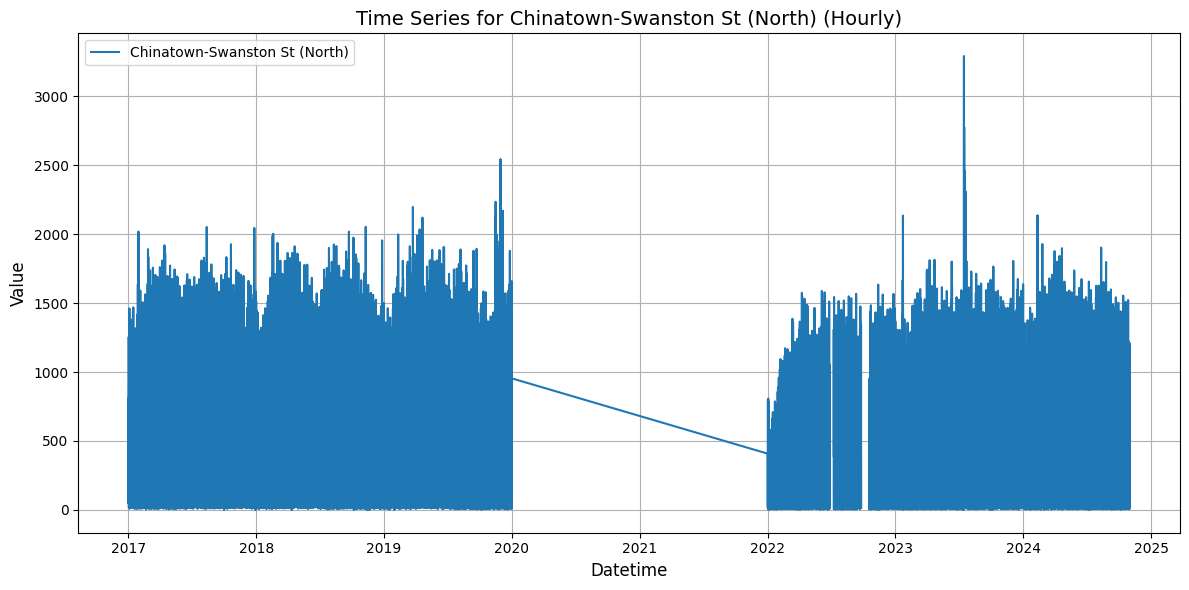

Chinatown-Lt Bourke St (South)


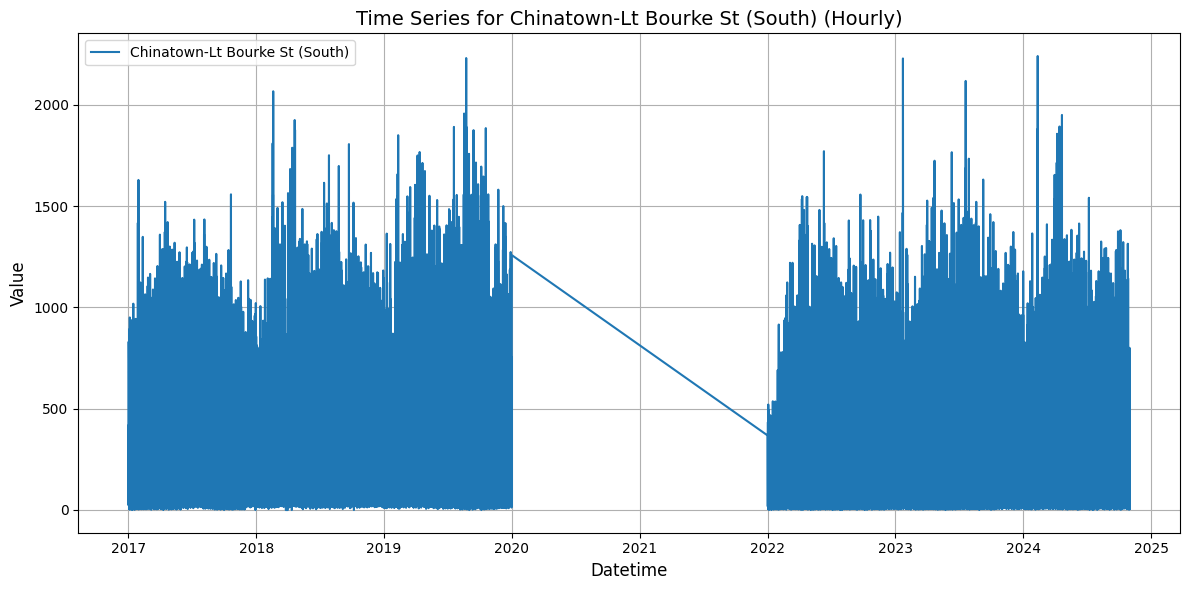

Lonsdale St (South)


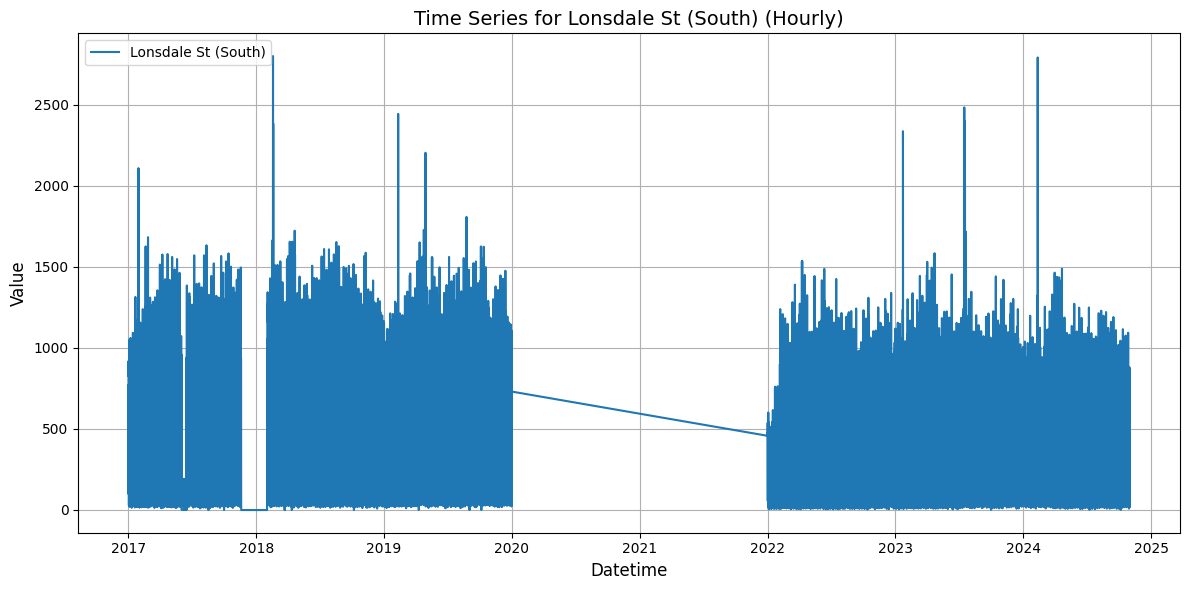

Flinders St-Spring St (West)


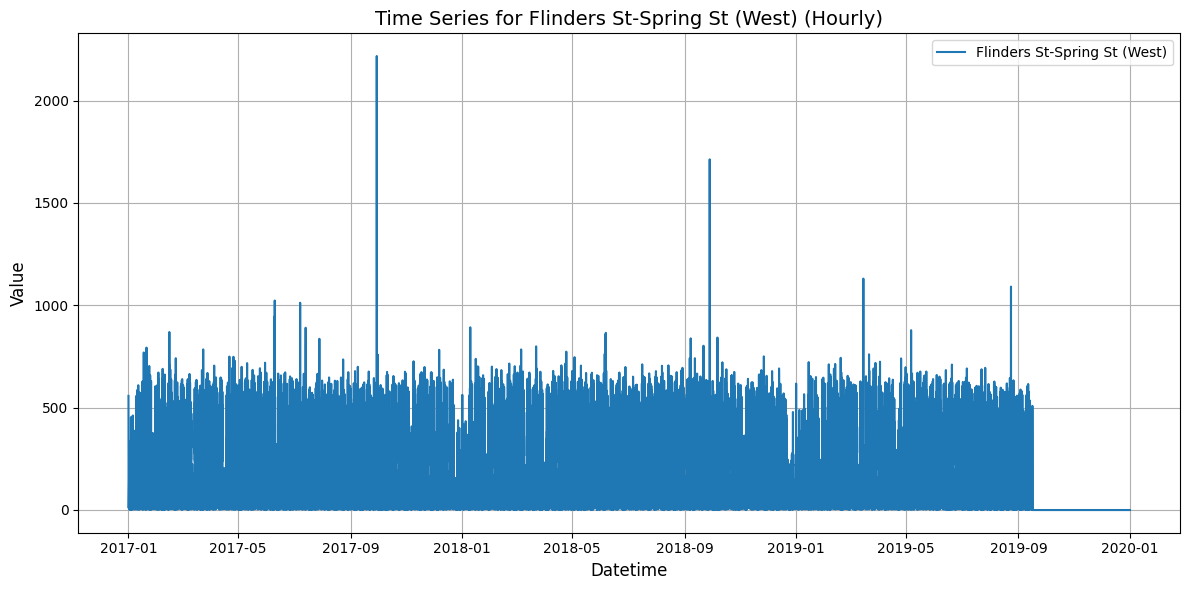

Birrarung Marr


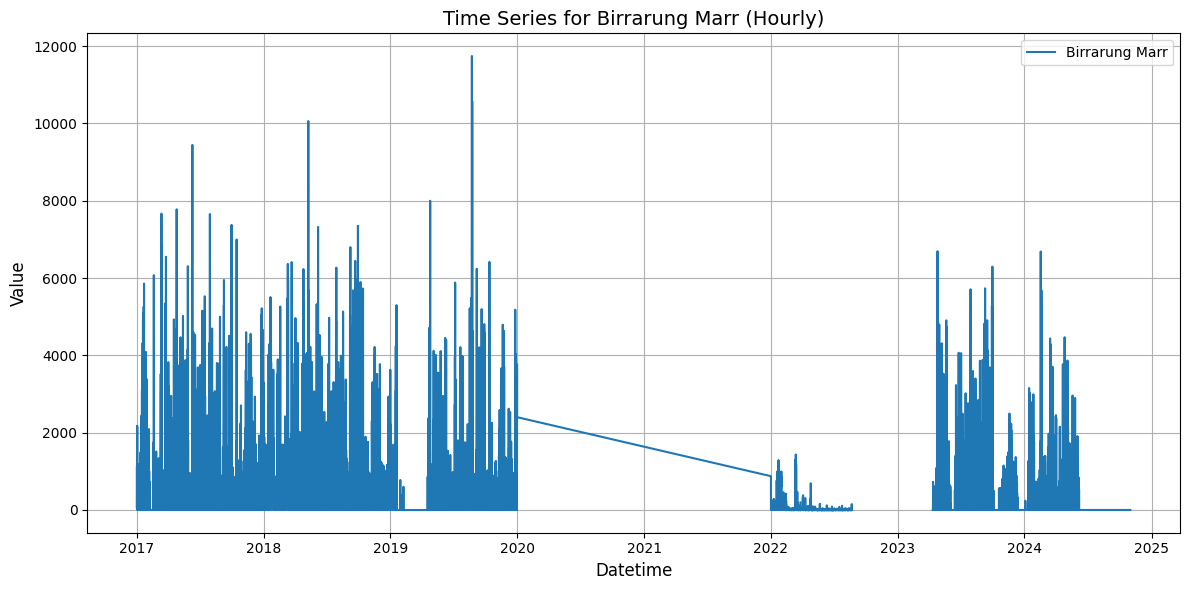

Alfred Place


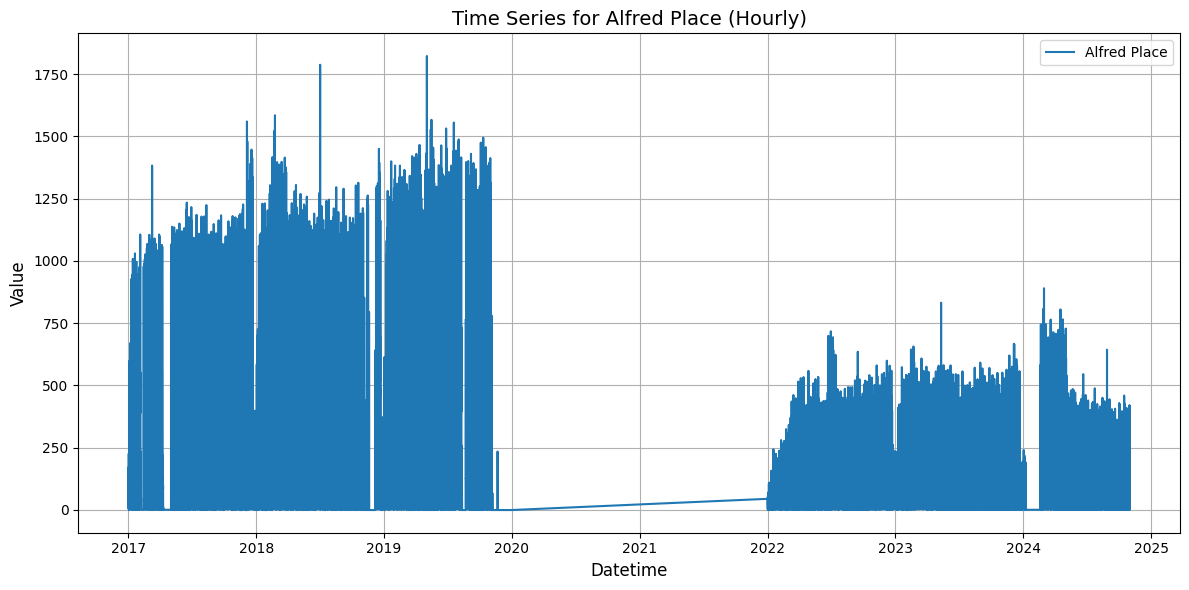

Flinders St-Swanston St (West)


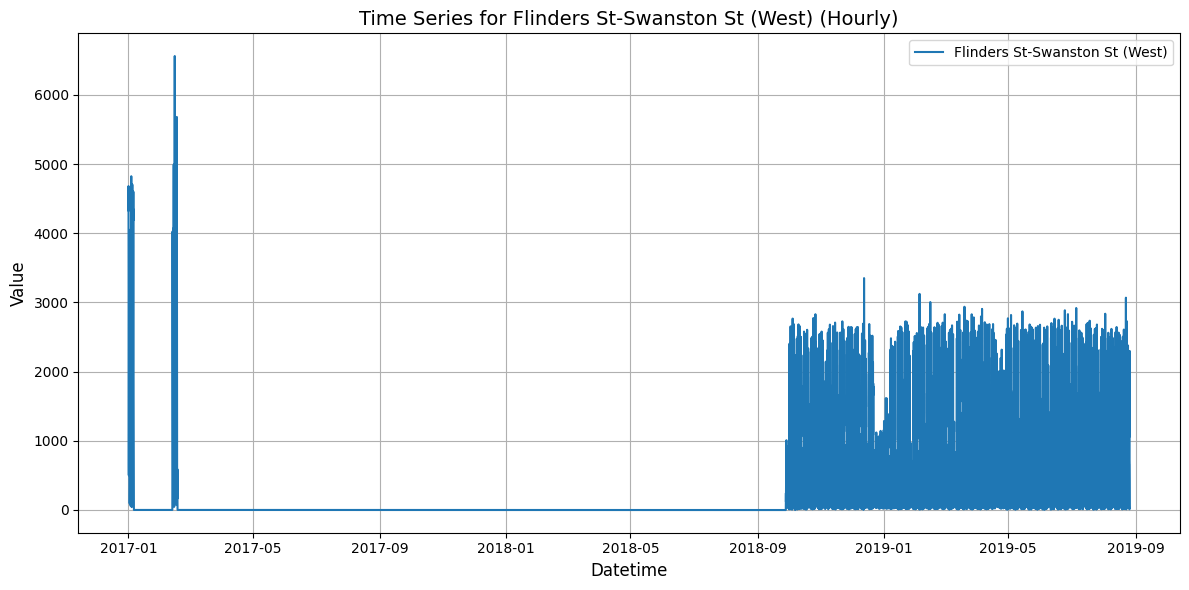

City Square


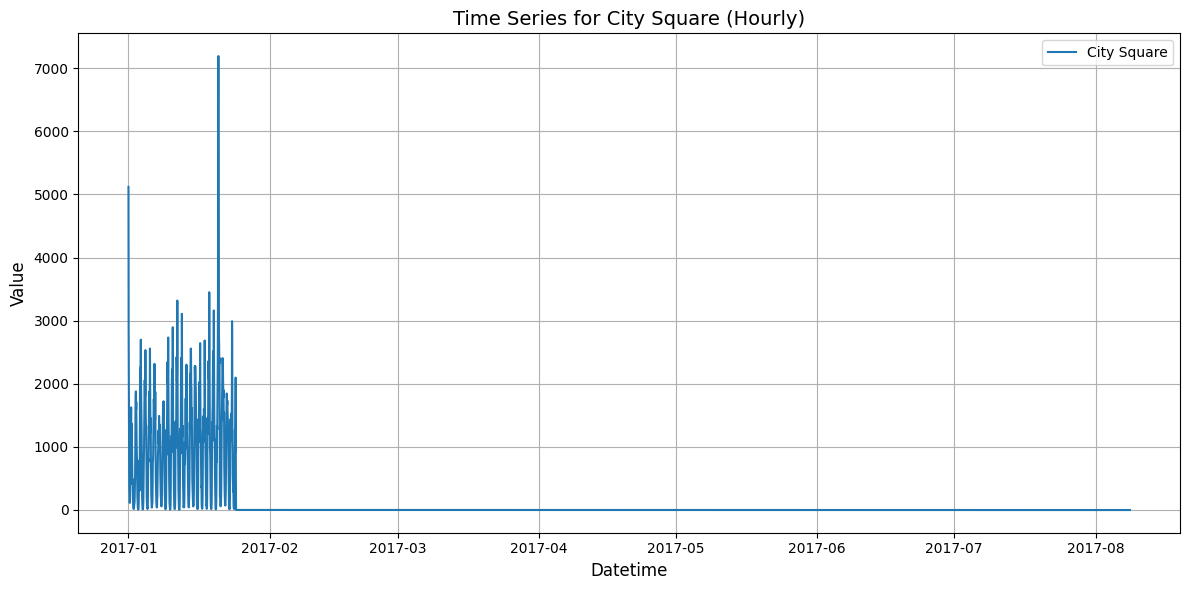

Grattan St-Swanston St (West)


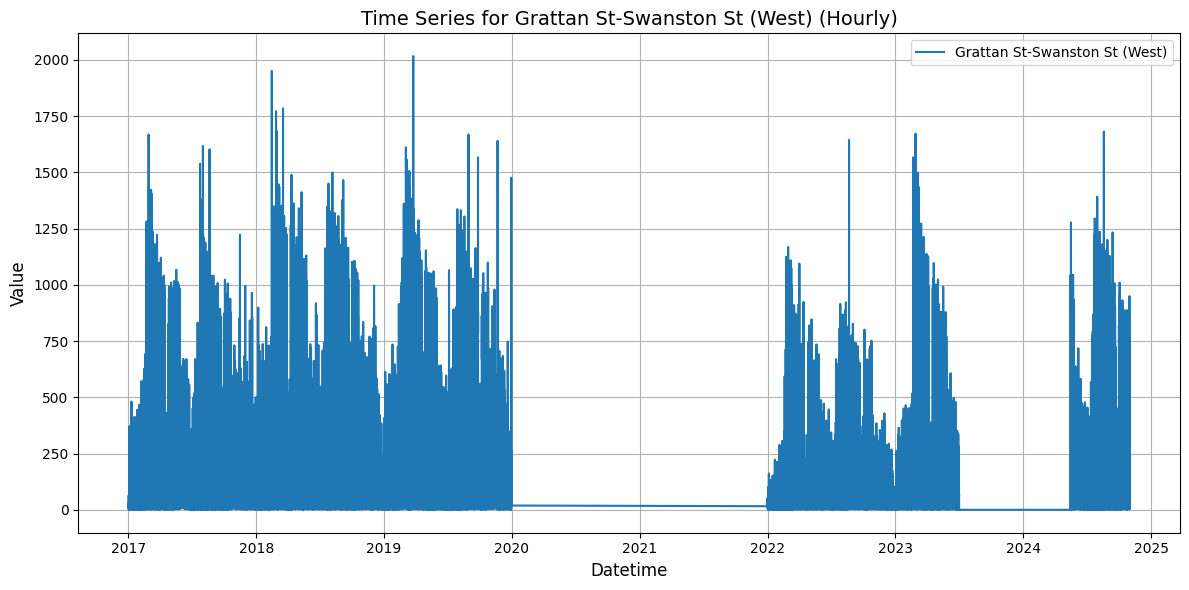

Monash Rd-Swanston St (West)


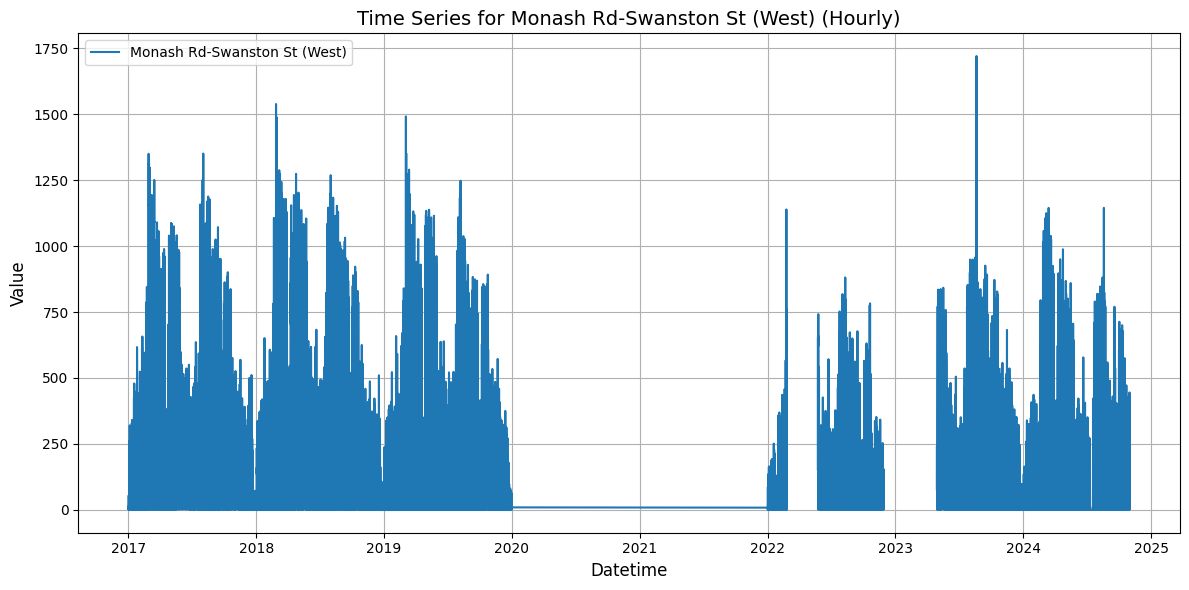

Tin Alley-Swanston St (West)


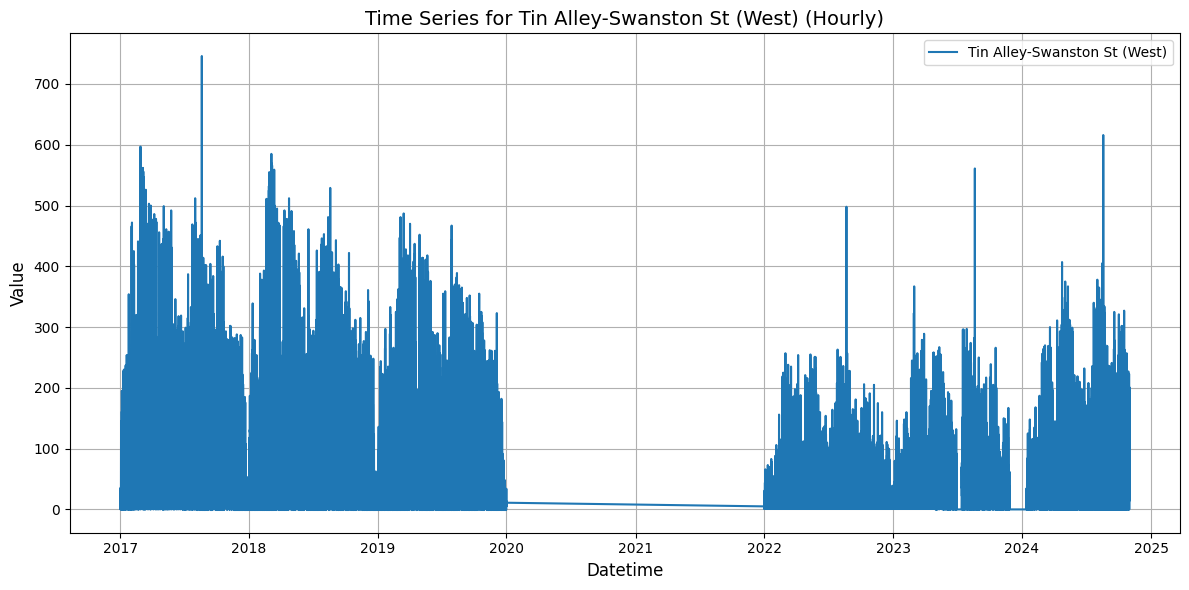

Southbank


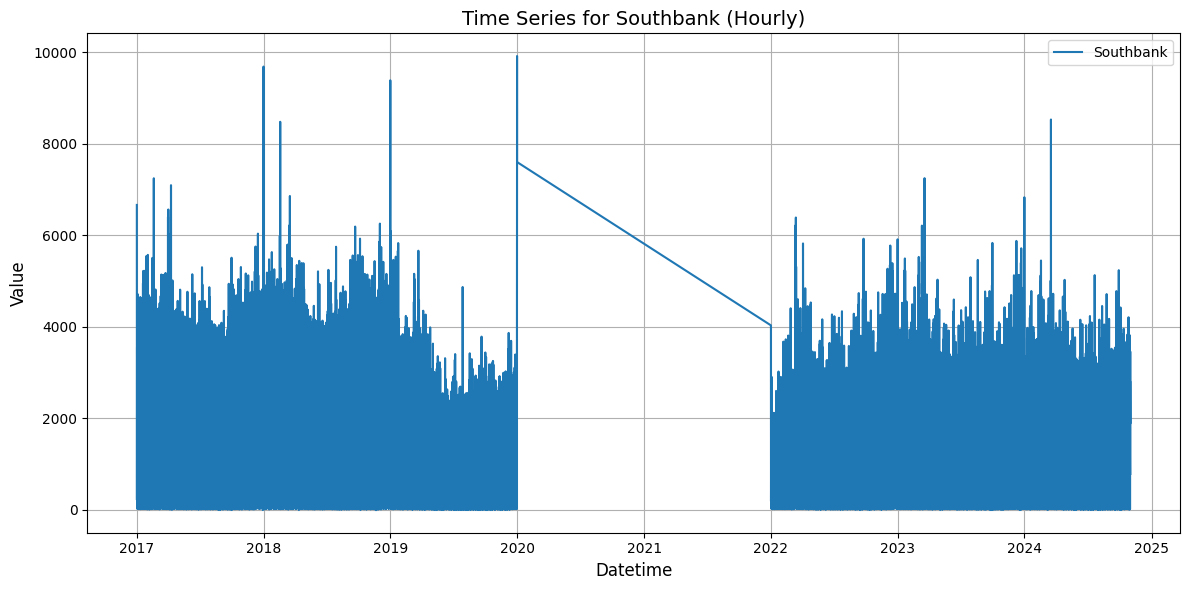

Flinders St-Elizabeth St (East)


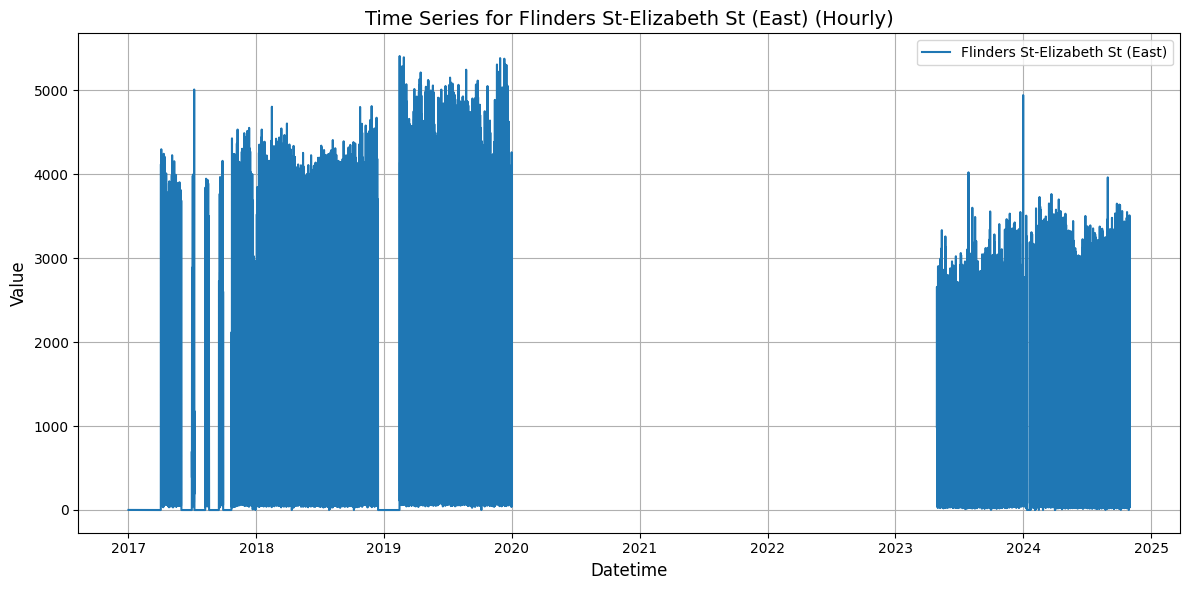

QV Market-Peel St


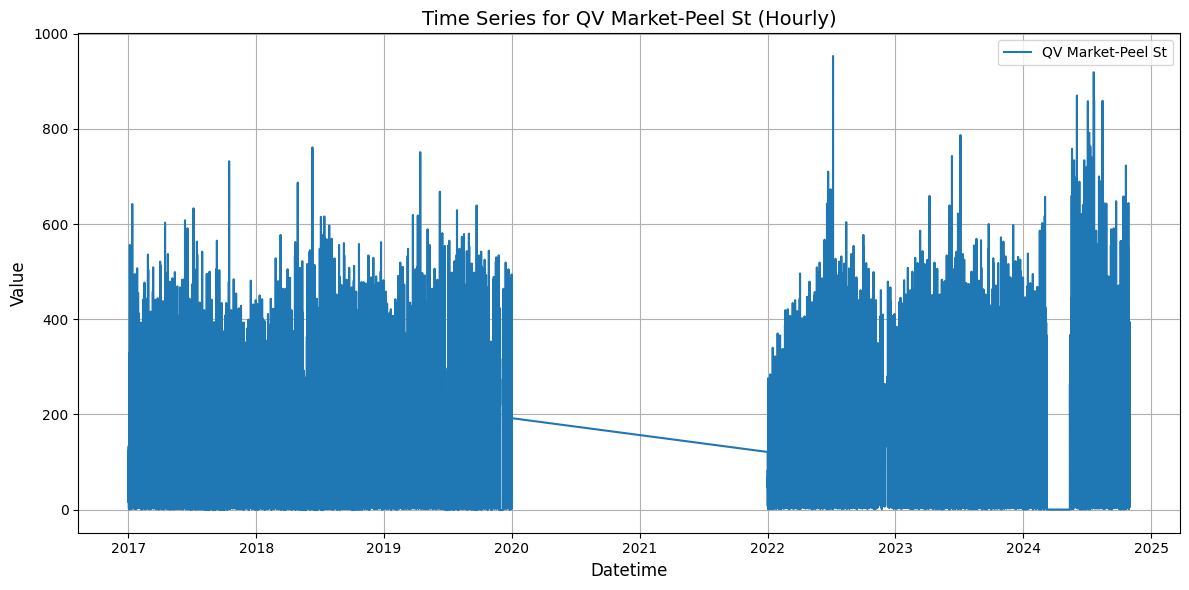

Bourke Street Mall (South)


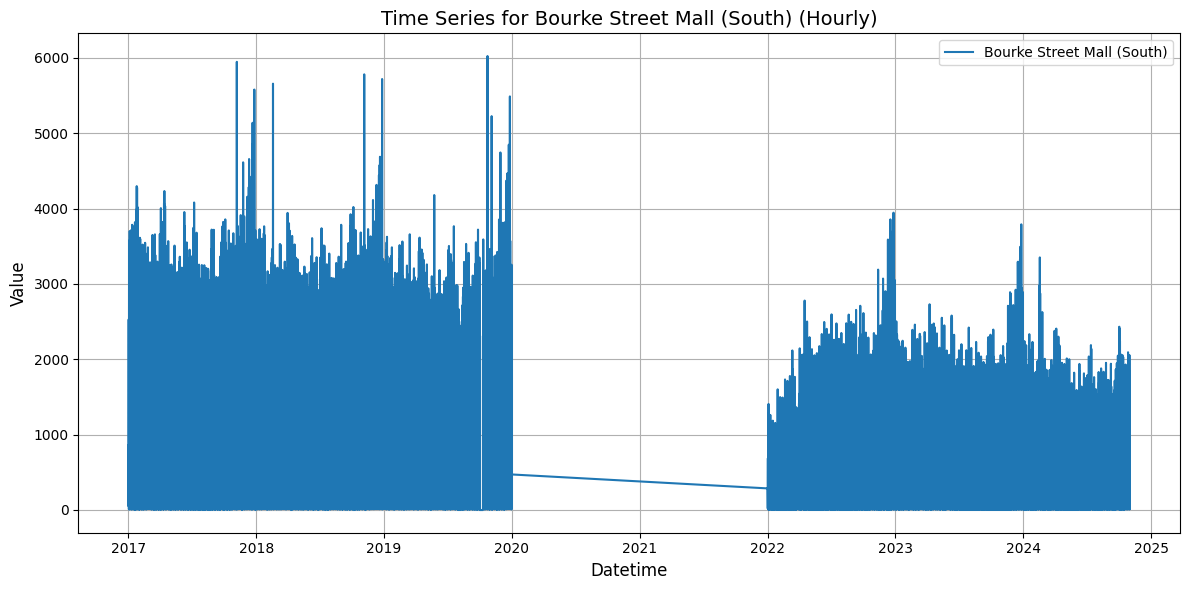

Southern Cross Station


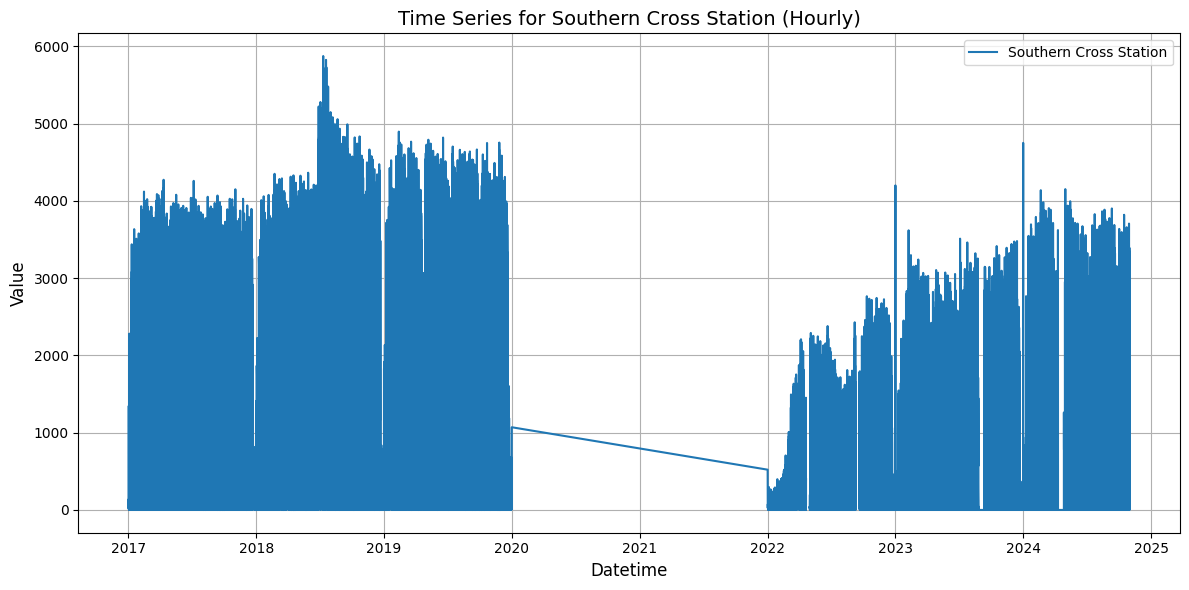

Collins Place (South)


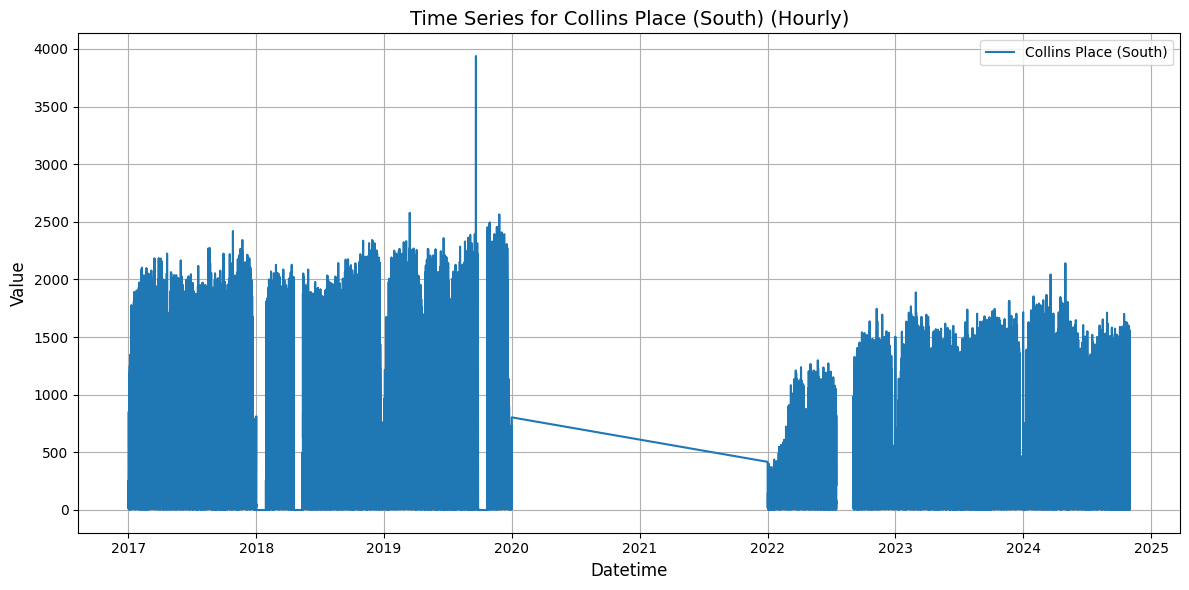

Collins Place (North)


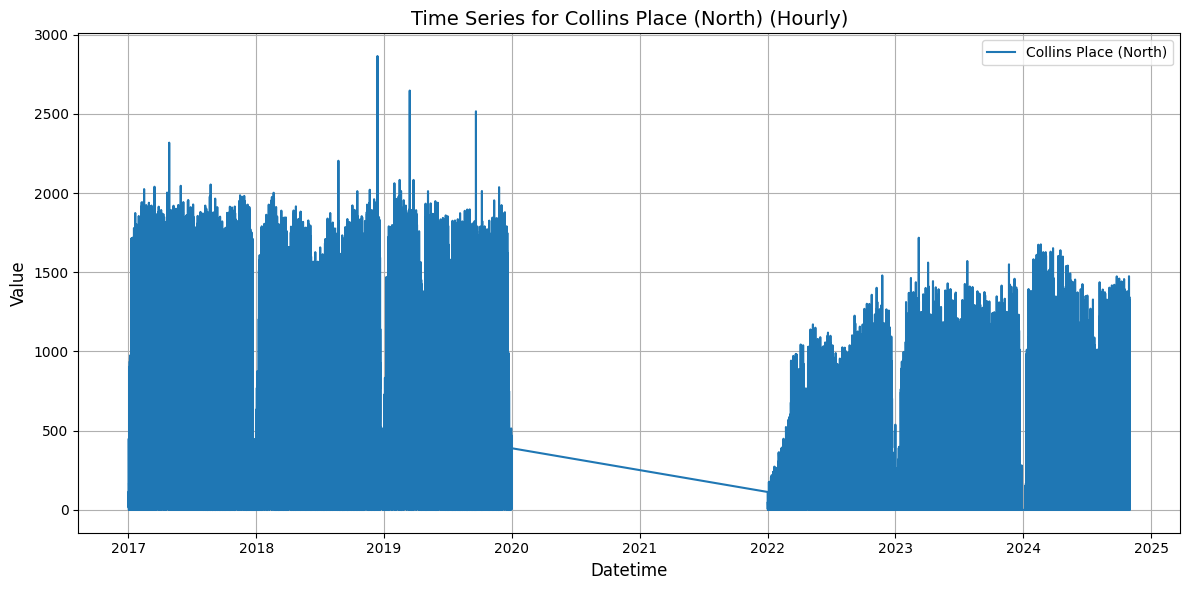

Flagstaff Station


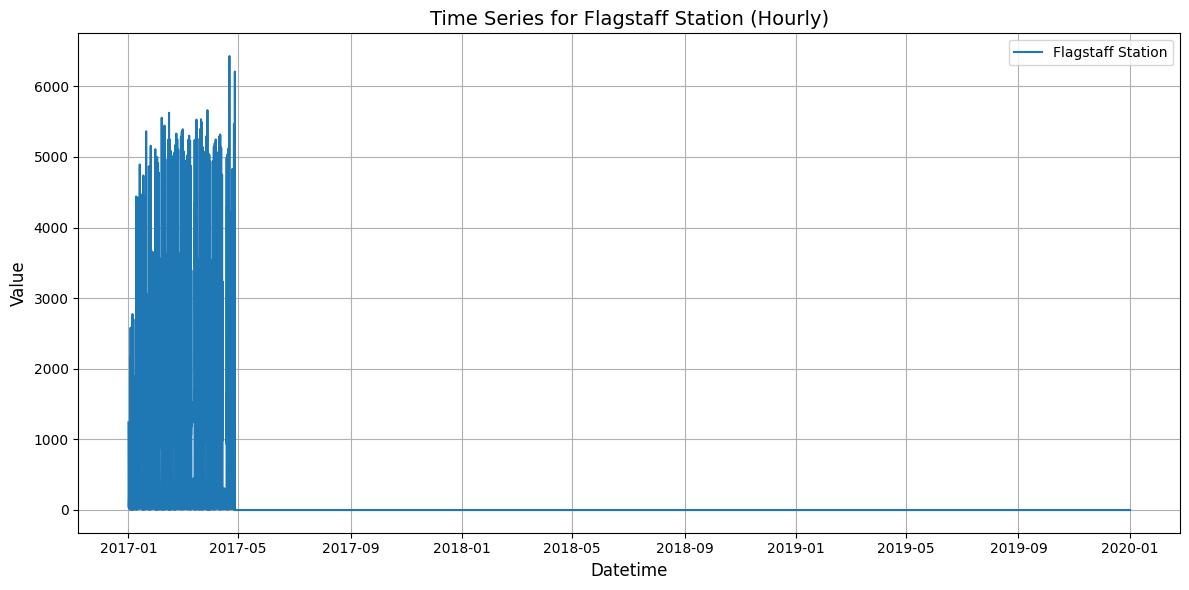

Melbourne Central


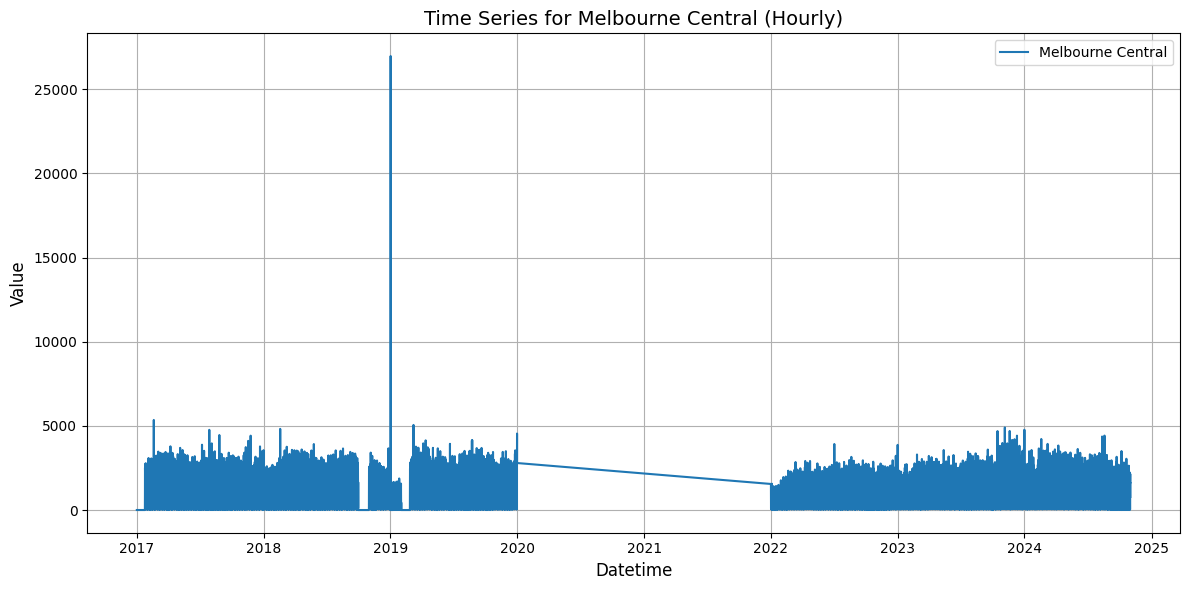

Sandridge Bridge


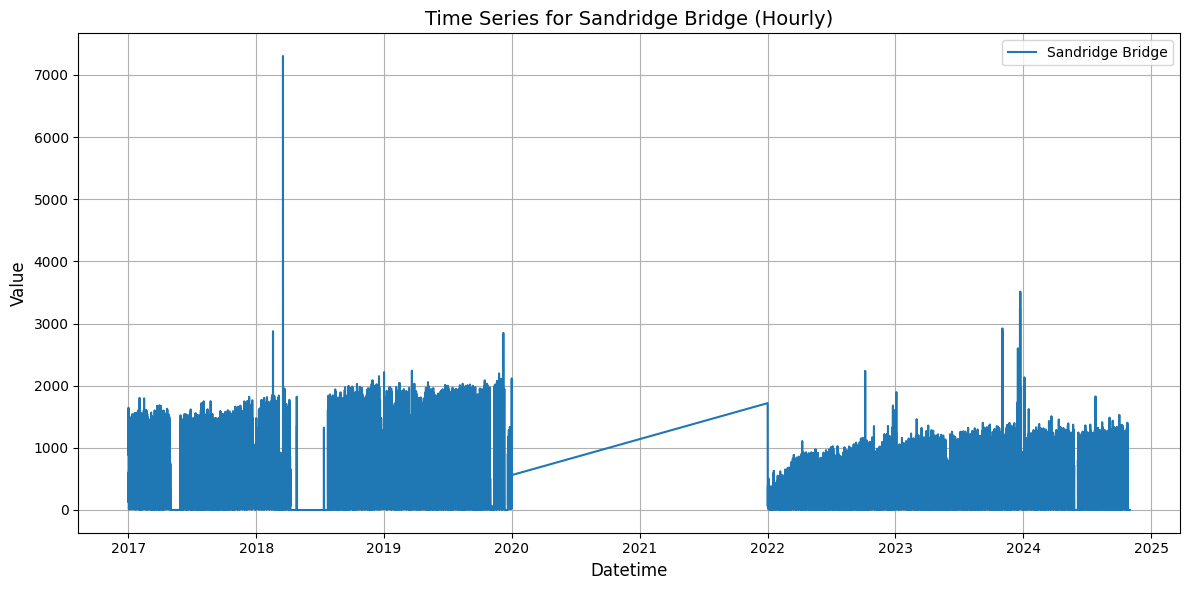

Town Hall (West)


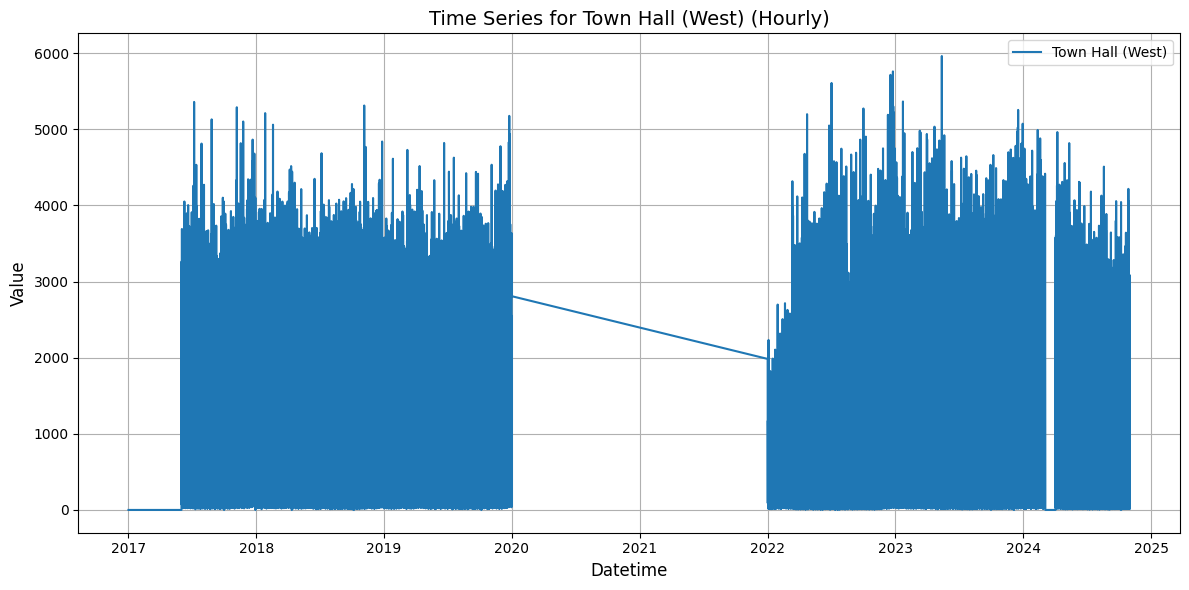

Bourke Street Mall (North)


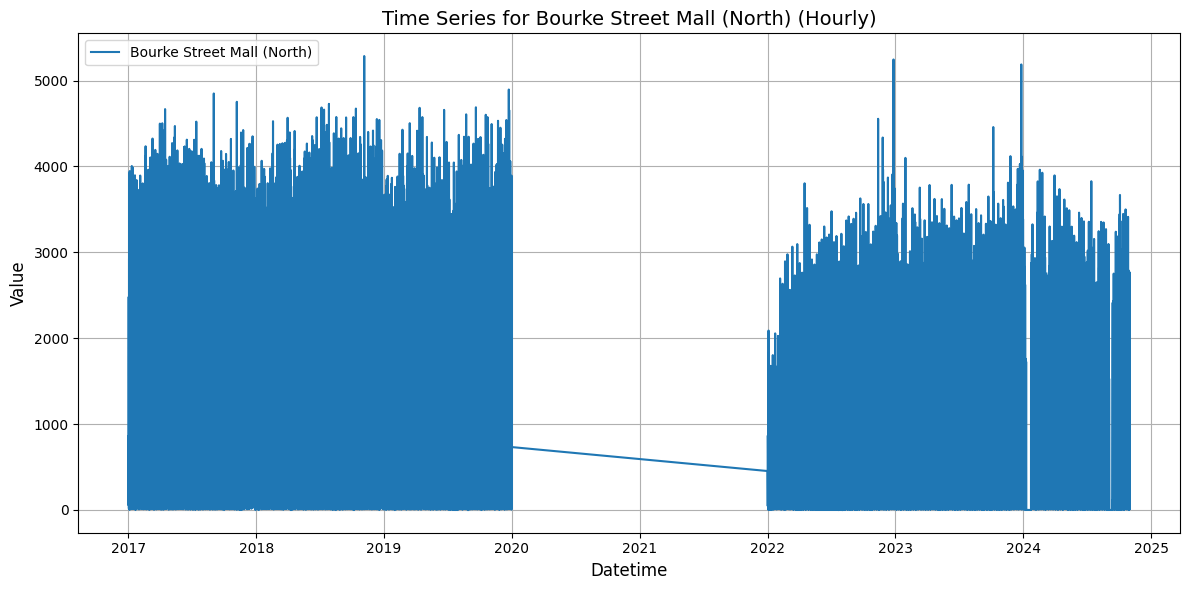

State Library


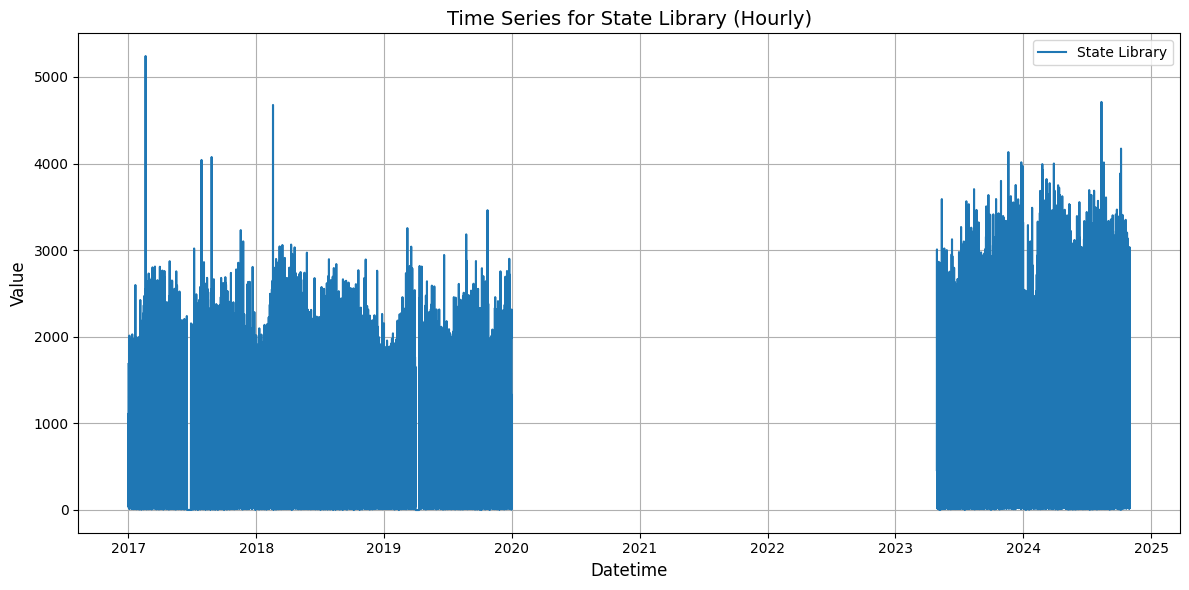

Victoria Point


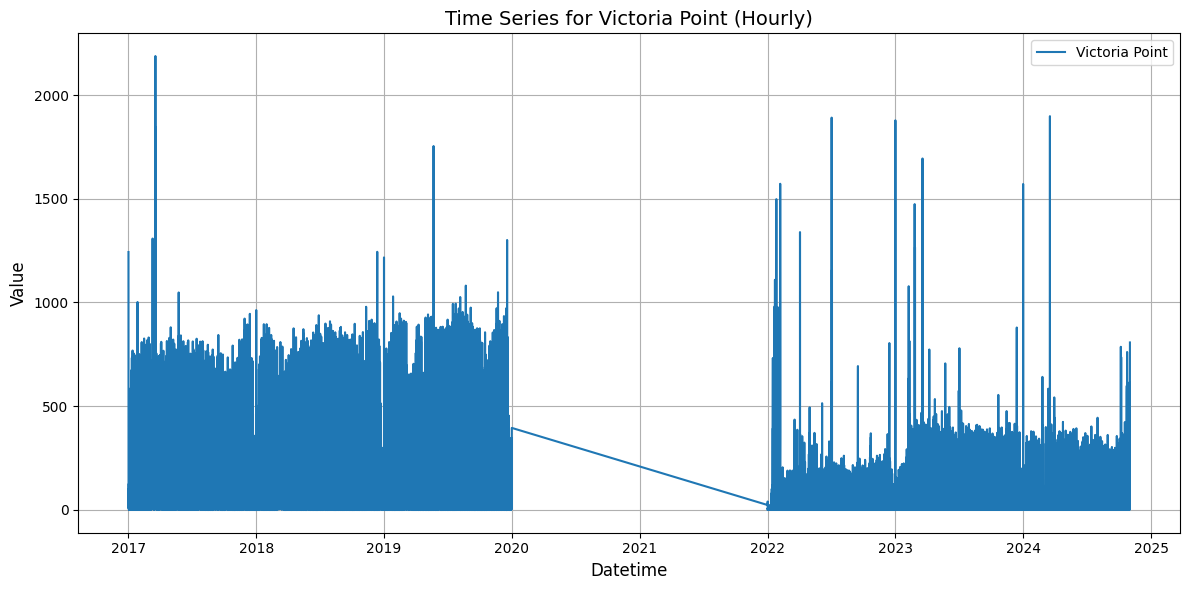

New Quay


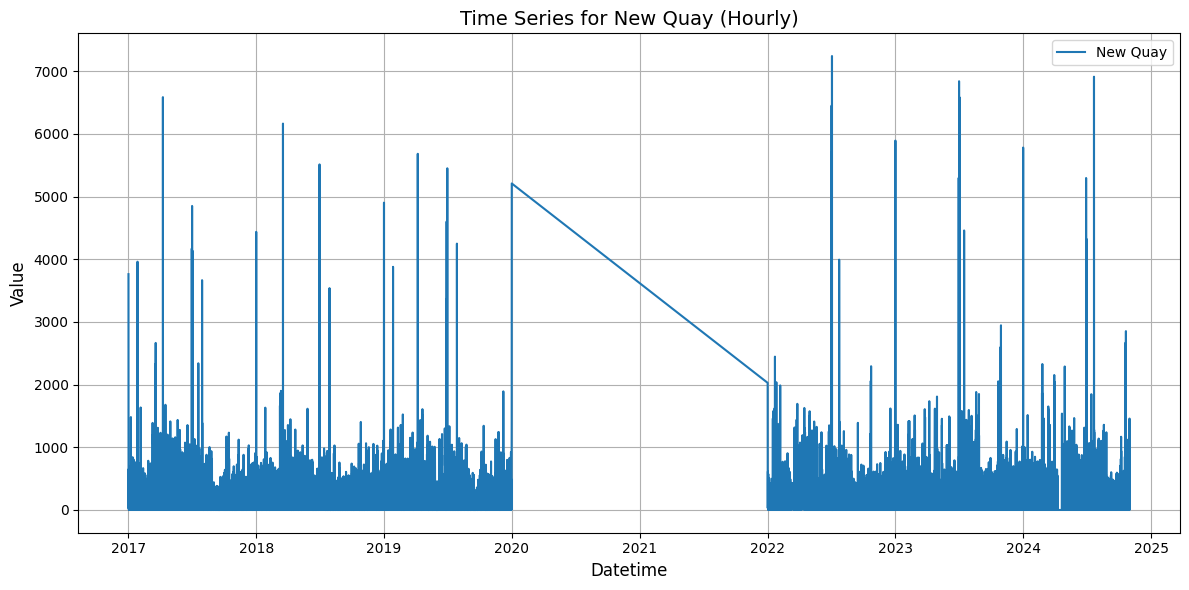

Waterfront City


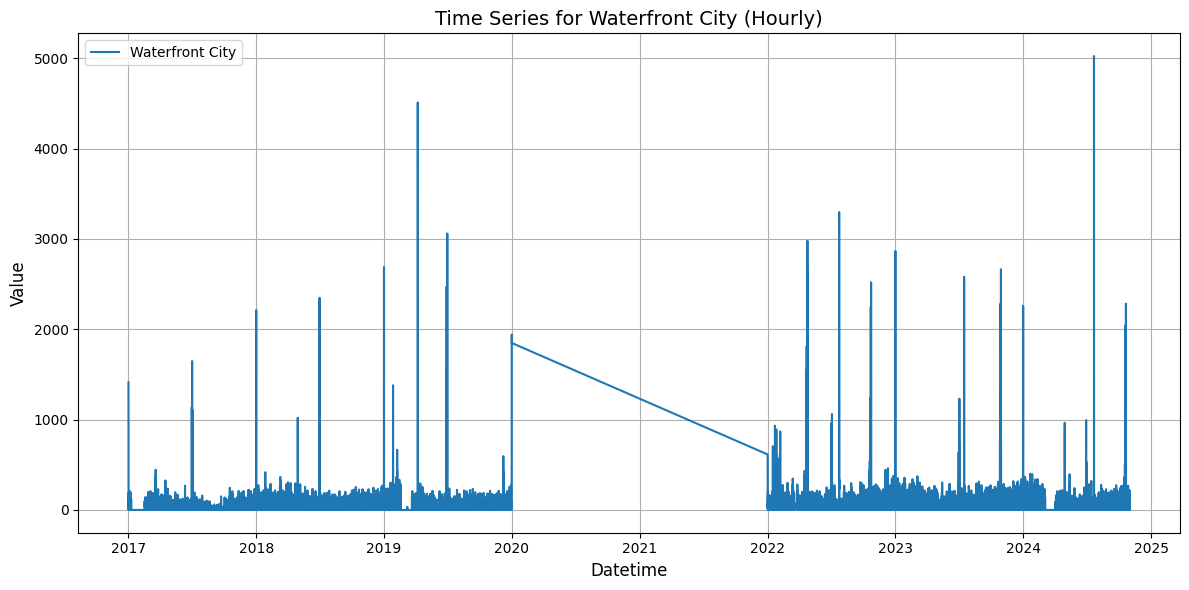

Webb Bridge


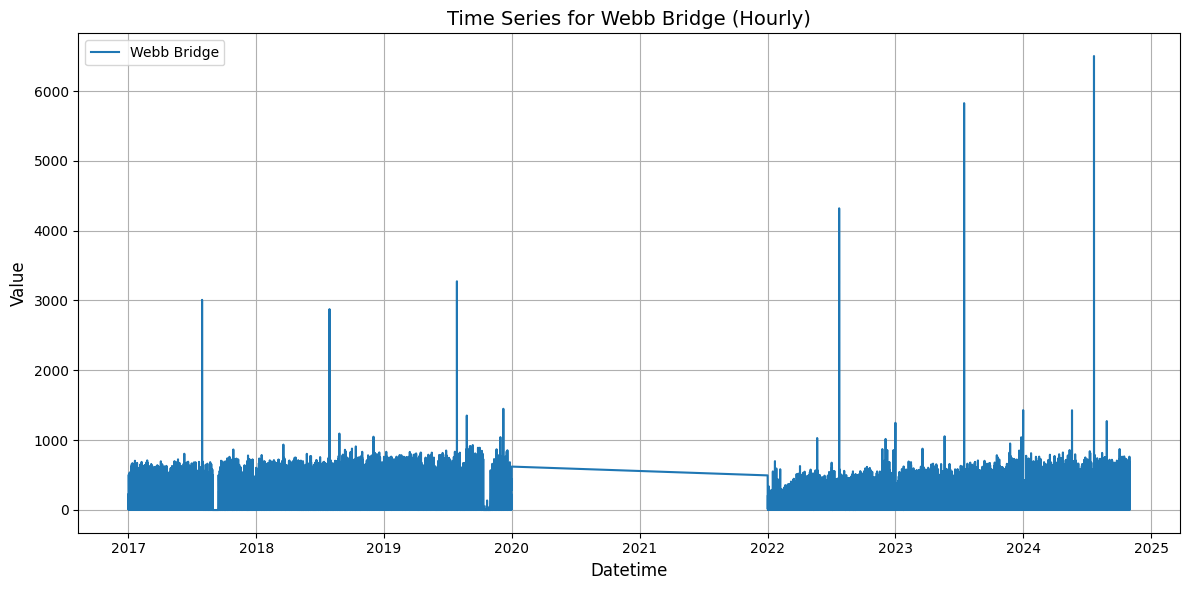

Princes Bridge


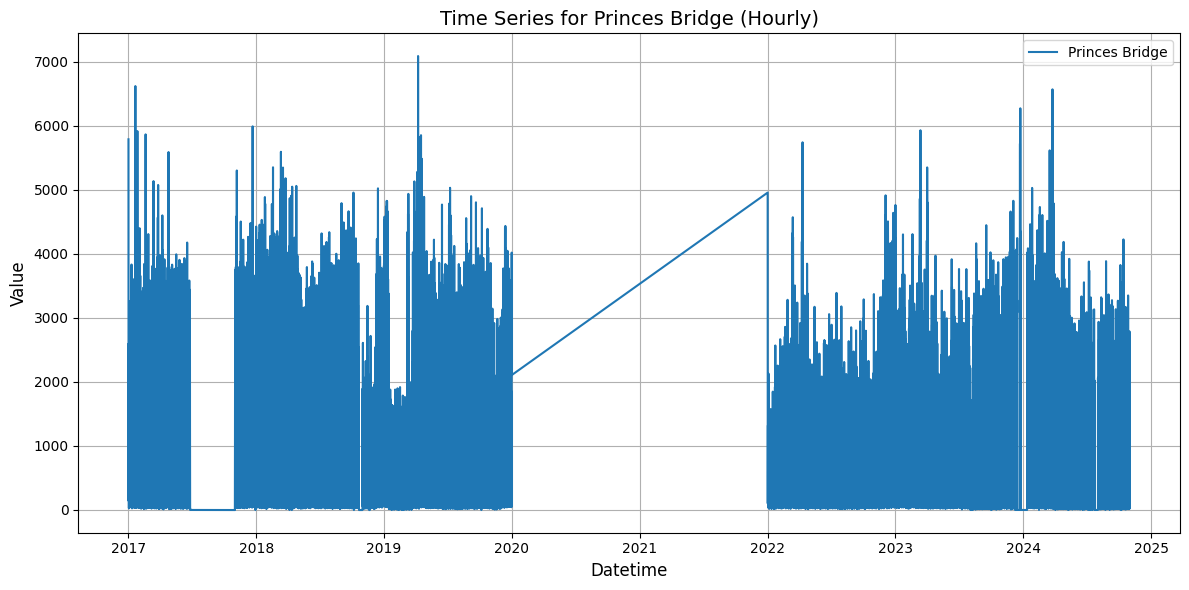

In [11]:
data_folder = '..\\data\\raw'
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = ['2017', '2018', '2019', '2022', '2023', '2024']
import os
import pandas as pd
import matplotlib.pyplot as plt


# Placeholder for combined data
combined_data = pd.DataFrame()

# Load all datasets and combine relevant columns
for year in years:
    for month in months:
        filename = f"{month}_{year}.csv"
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                # Ensure 'Date' and 'Hour' are included
                required_cols = ['Date', 'Hour'] + list_70
                if all(col in df.columns for col in required_cols):
                    filtered_df = df[required_cols].copy()
                    combined_data = pd.concat([combined_data, filtered_df], ignore_index=True)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
        else:
            print(f"{filename} not found")

# Ensure Date and Hour columns are combined into a datetime index
if not combined_data.empty:
    combined_data['Datetime'] = pd.to_datetime(
        combined_data['Date'], format='%d/%m/%Y', errors='coerce'
    ) + pd.to_timedelta(combined_data['Hour'], unit='h')
    combined_data.set_index('Datetime', inplace=True)
    combined_data.sort_index(inplace=True)

    # Clean numeric columns
    for column in list_70:
        combined_data[column] = pd.to_numeric(combined_data[column], errors='coerce')

# Plot time series for each column in list_70
for column in list_70:
    if column in combined_data.columns:
        print(f"{column}")
        plt.figure(figsize=(12, 6))
        plt.plot(combined_data.index, combined_data[column], label=column)
        plt.title(f"Time Series for {column} (Hourly)", fontsize=14)
        plt.xlabel("Datetime", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column {column} not found in combined data.")

### Removing more

In [12]:
# Remove columns with a lot of 0
# List of entries to remove
unwanted_entries = ['State Library','Flagstaff Station', 'Flinders St-Elizabeth St (East)', 'QV Market-Peel St', 'Birrarung Marr','Flinders St-Spring St (West)', 'Flinders St-Swanston St (West)', 'City Square']  # Replace with the actual names of columns you want to remove

# Remove unwanted entries from list_70
list_70_new = [entry for entry in list_70 if entry not in unwanted_entries]

# Print to confirm removal
print("Updated list_70 after removing unwanted entries:")


Updated list_70 after removing unwanted entries:


November_2024.csv not found
December_2024.csv not found
Lygon St (West)


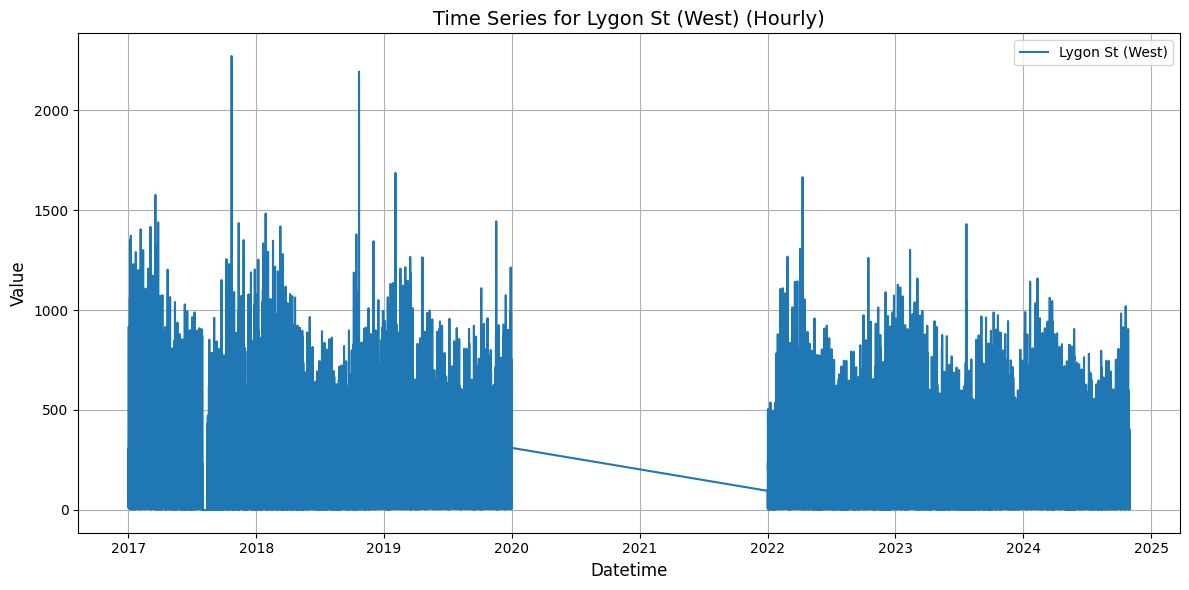

Spencer St-Collins St (North)


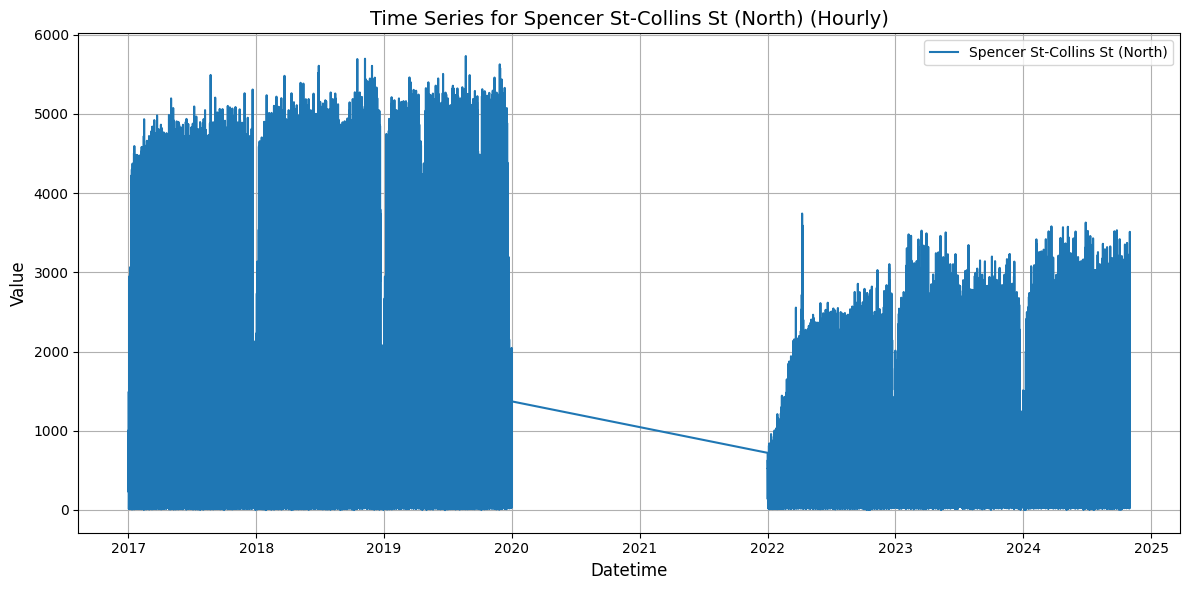

Spencer St-Collins St (South)


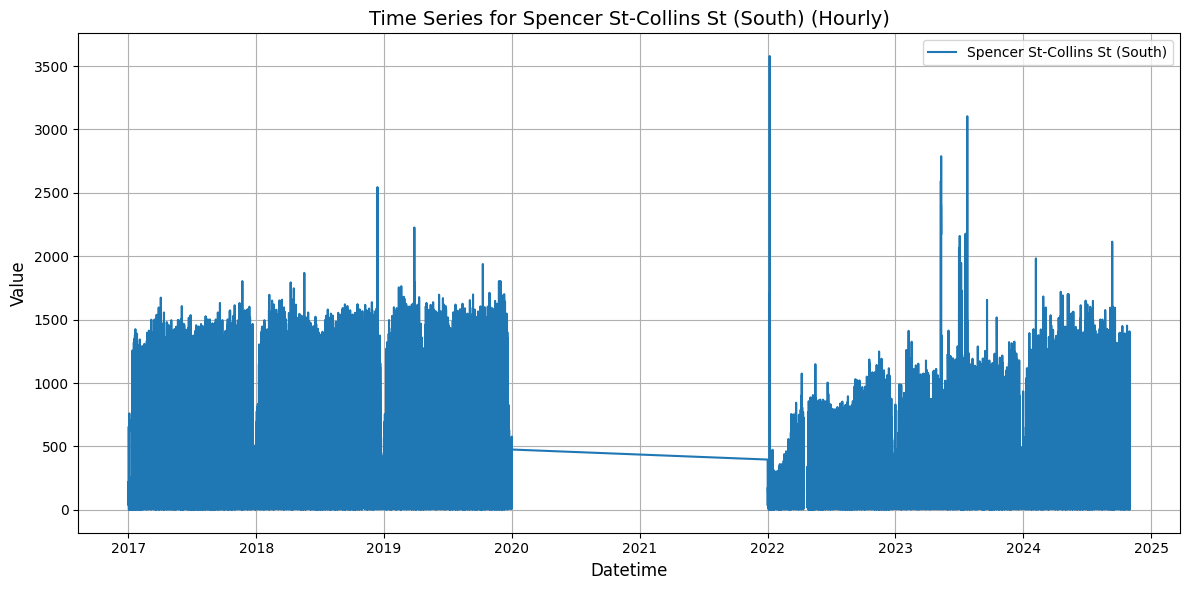

Bourke St-Russell St (West)


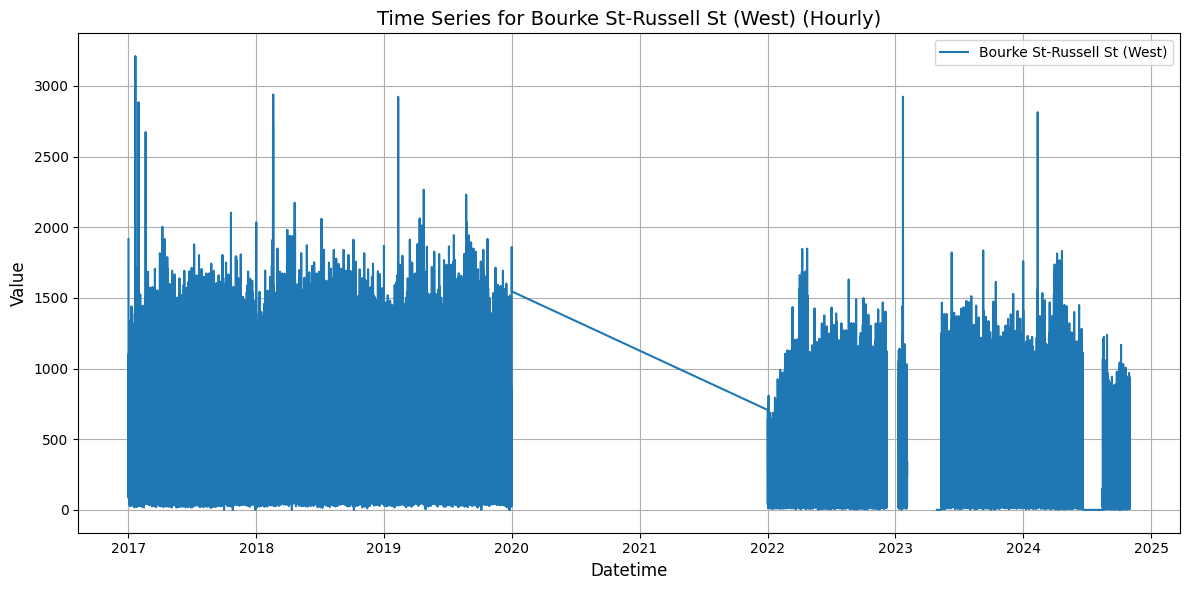

Chinatown-Swanston St (North)


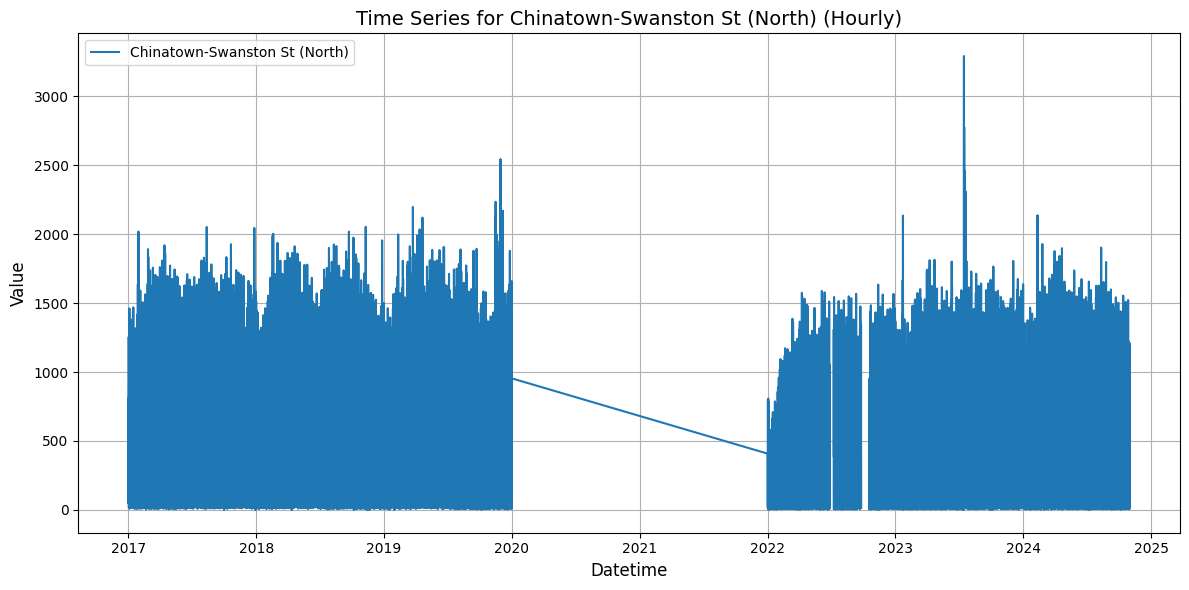

Chinatown-Lt Bourke St (South)


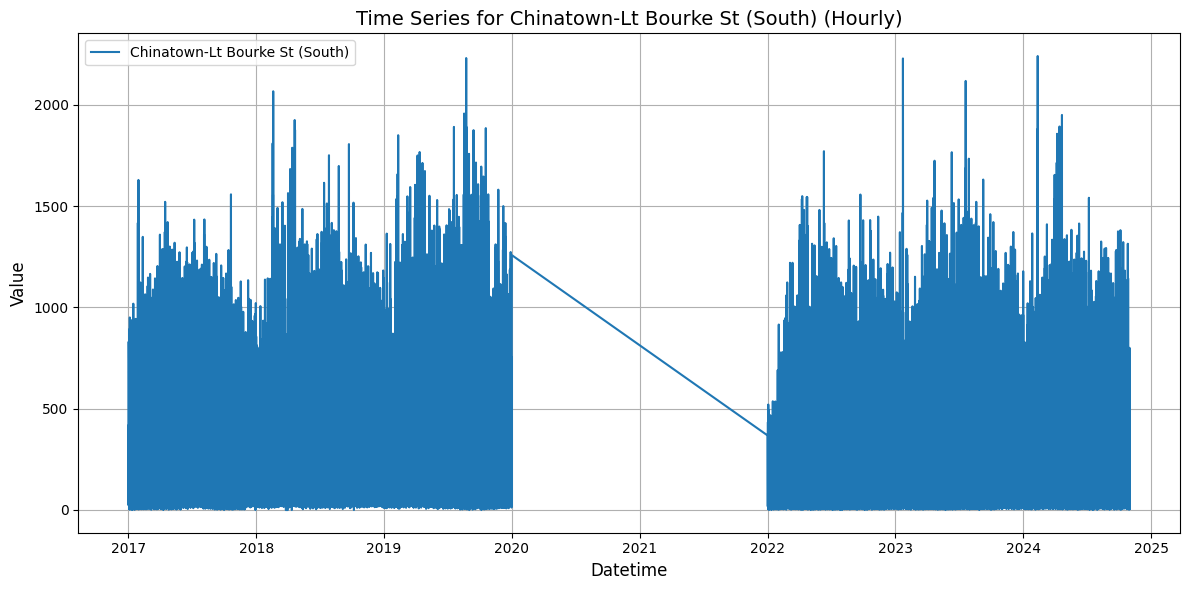

Lonsdale St (South)


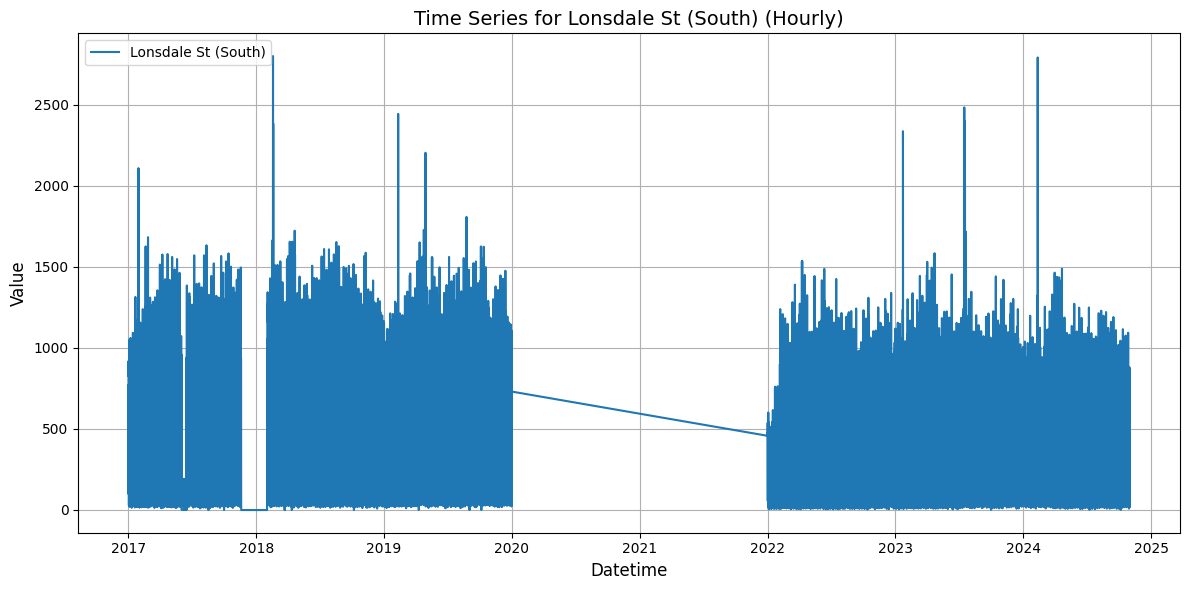

Alfred Place


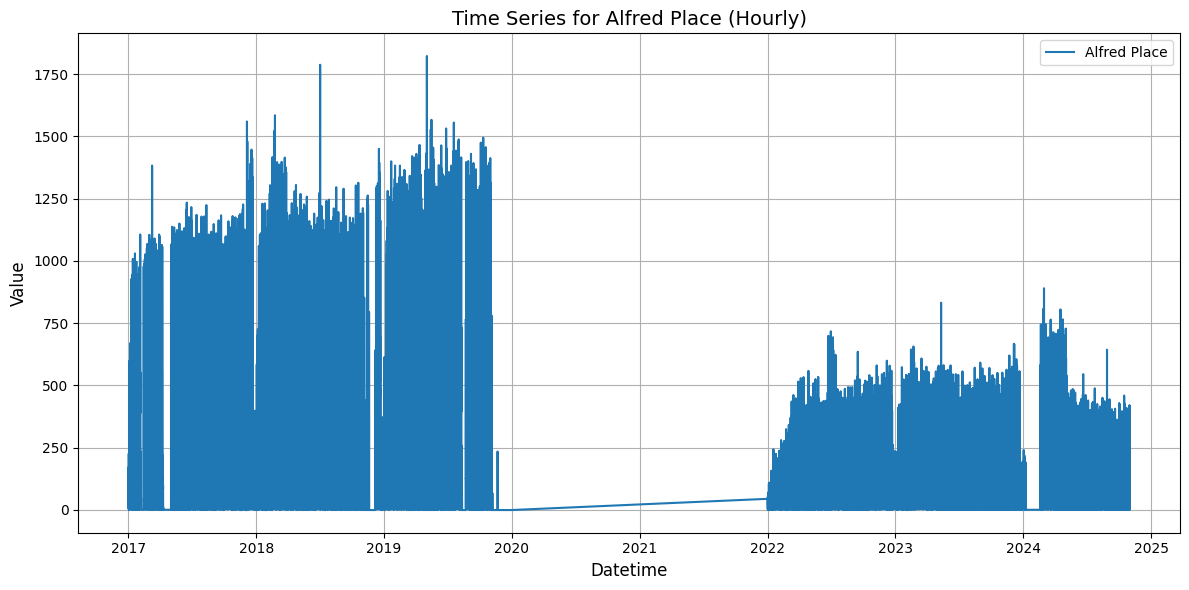

Grattan St-Swanston St (West)


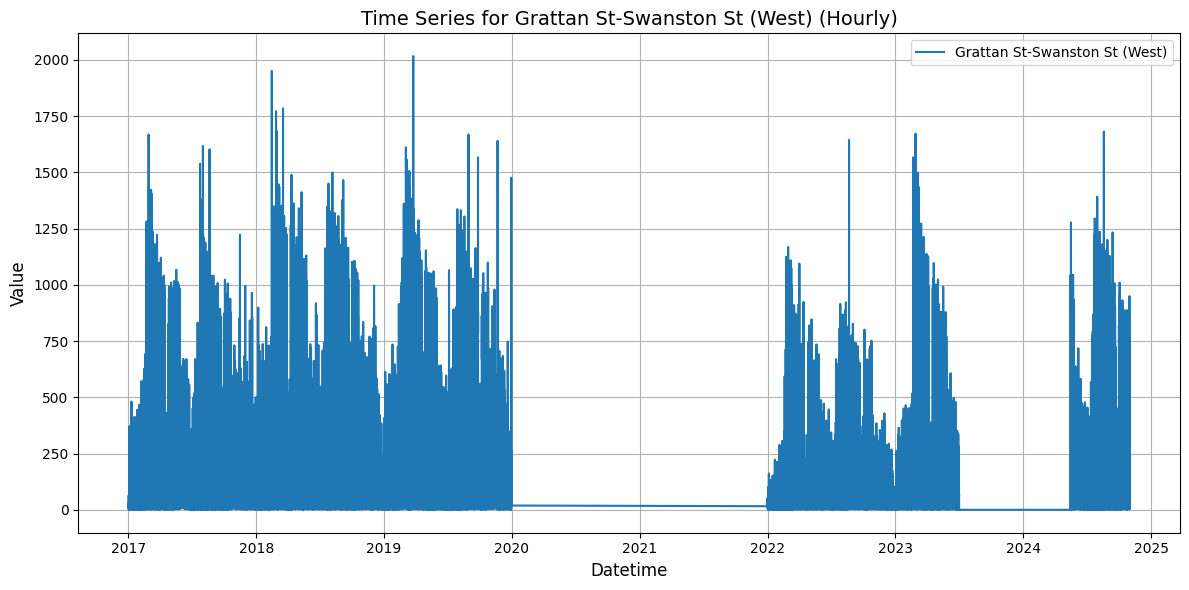

Monash Rd-Swanston St (West)


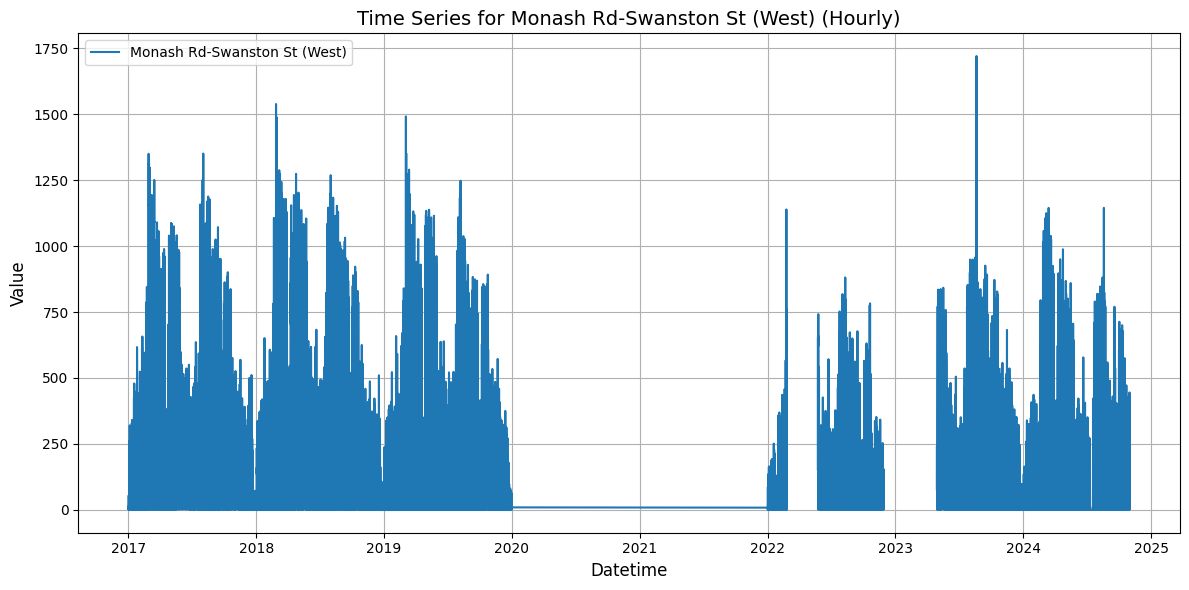

Tin Alley-Swanston St (West)


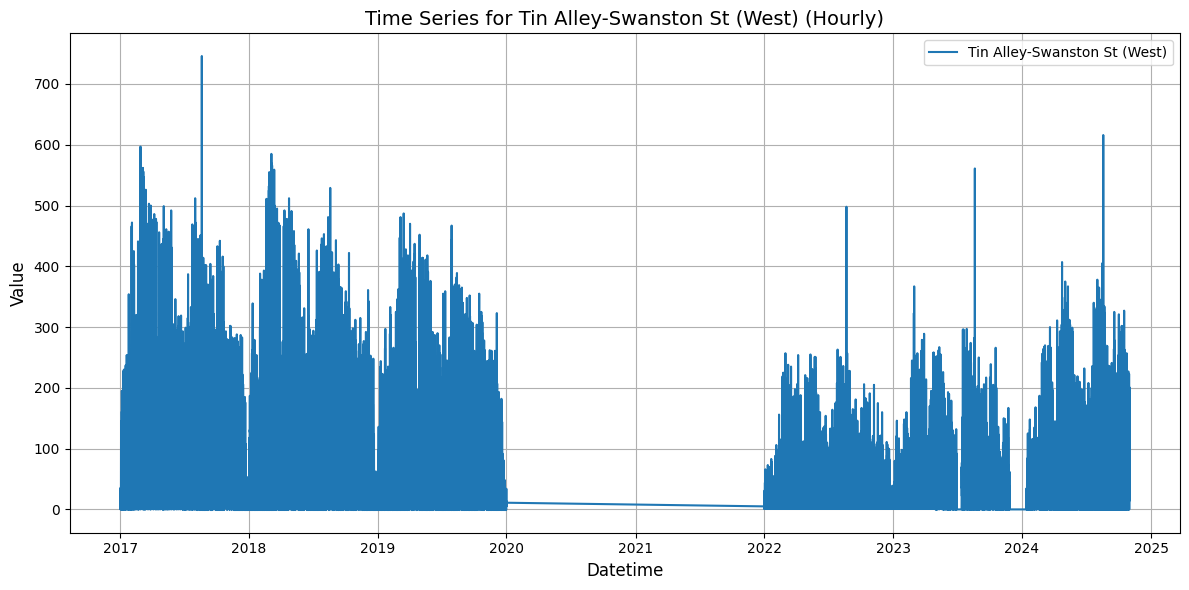

Southbank


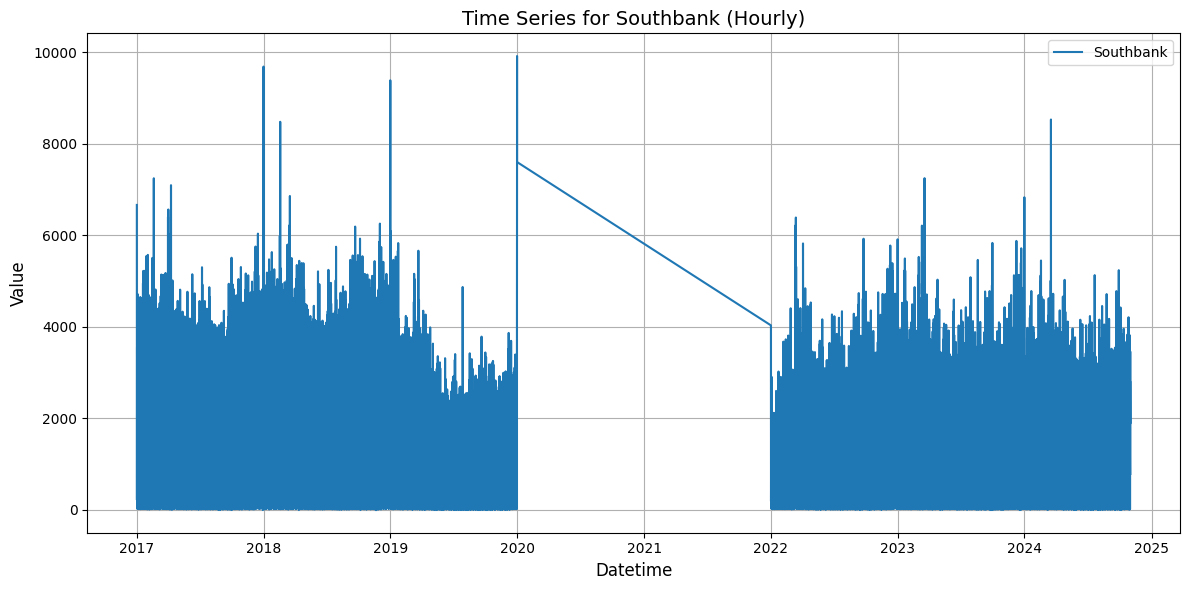

Bourke Street Mall (South)


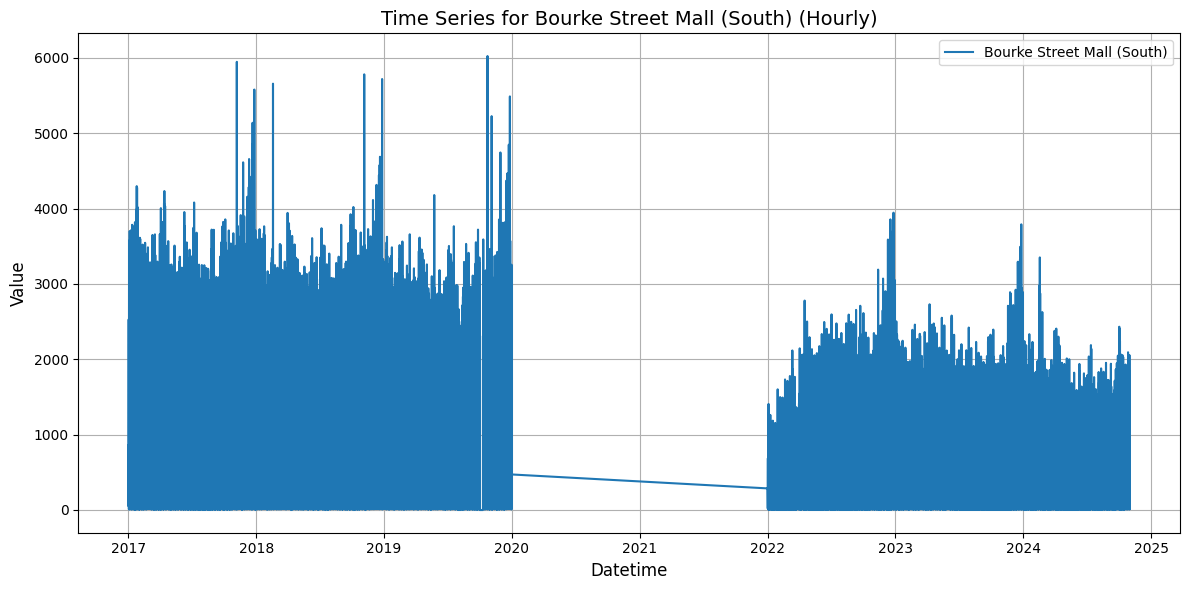

Southern Cross Station


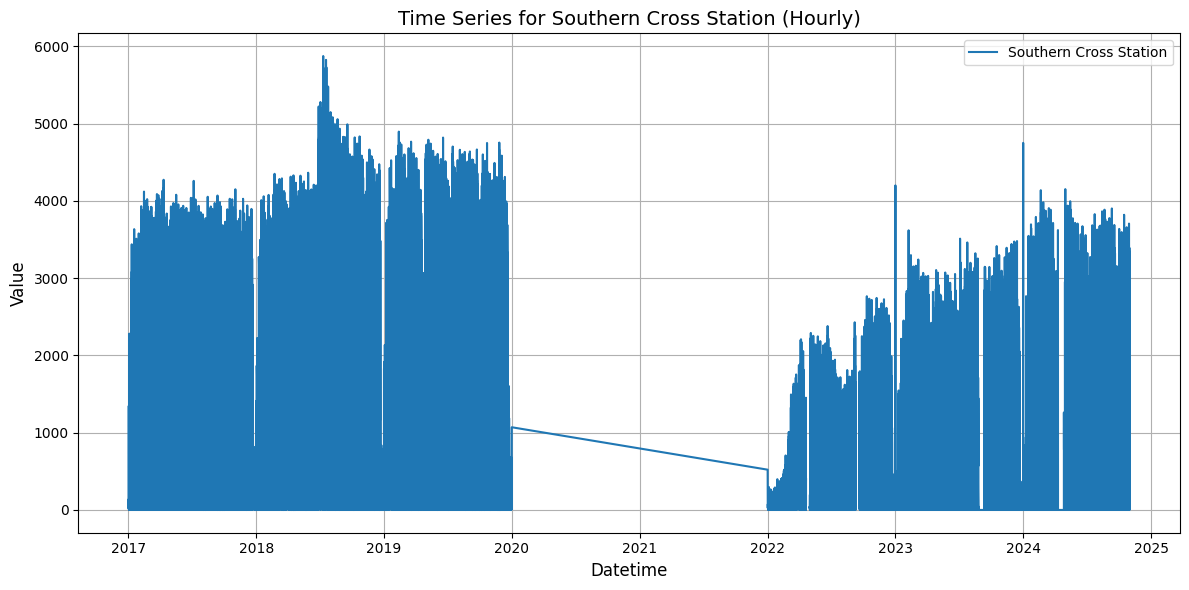

Collins Place (South)


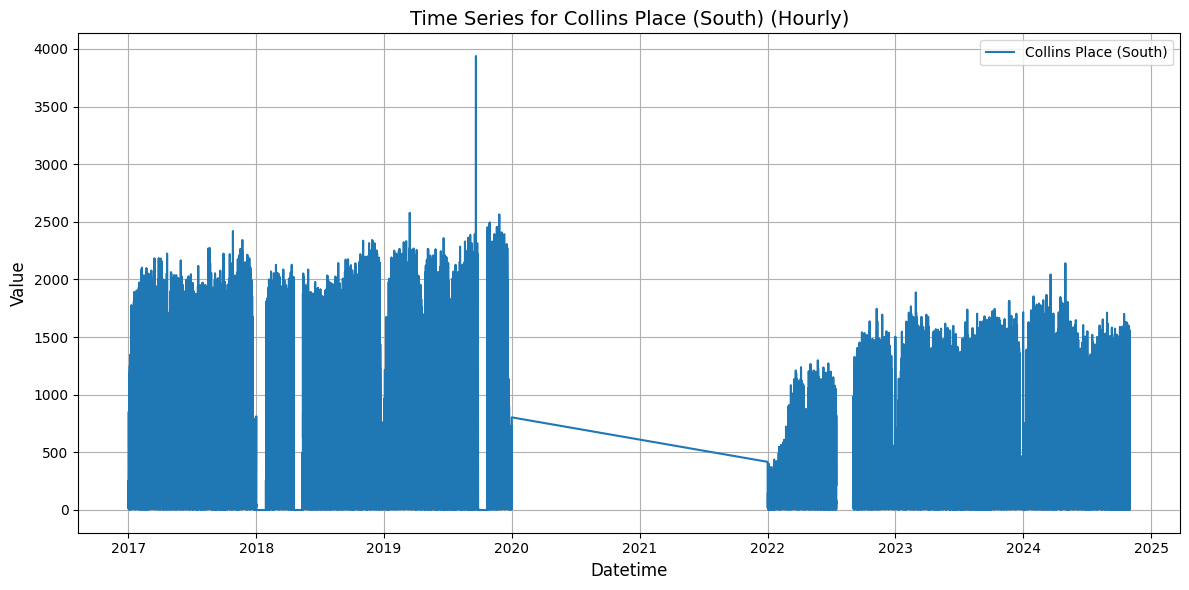

Collins Place (North)


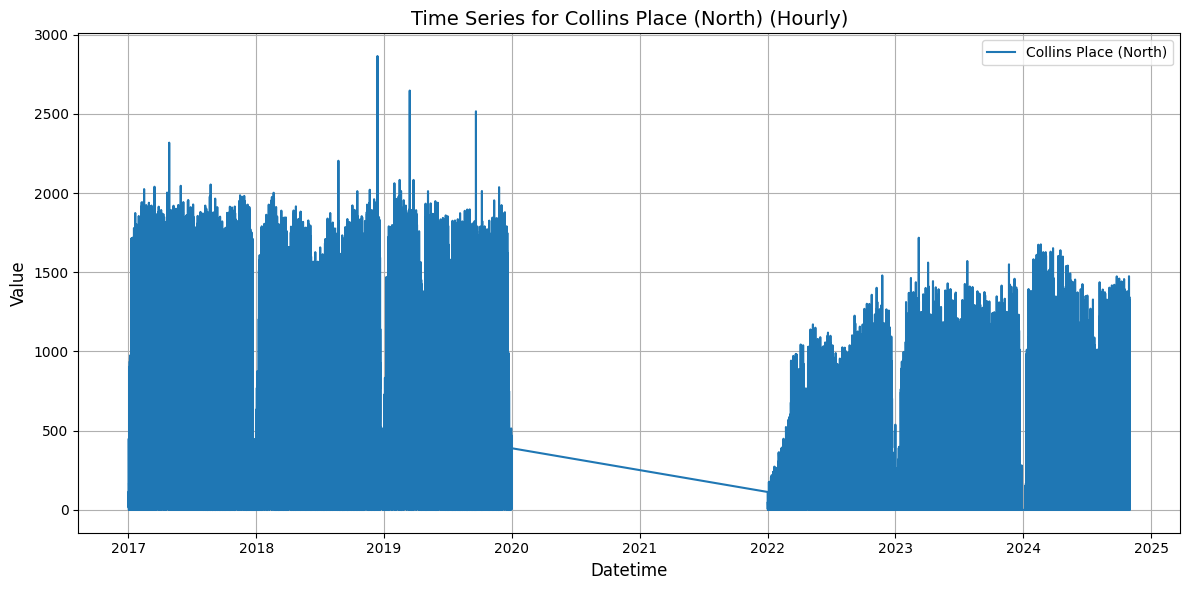

Melbourne Central


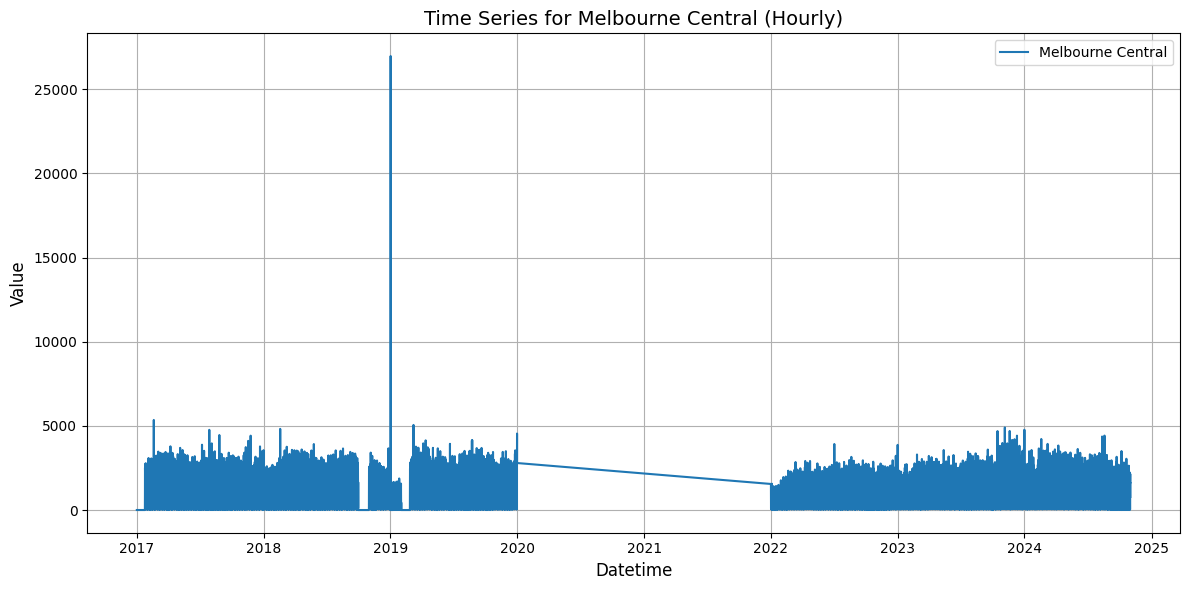

Sandridge Bridge


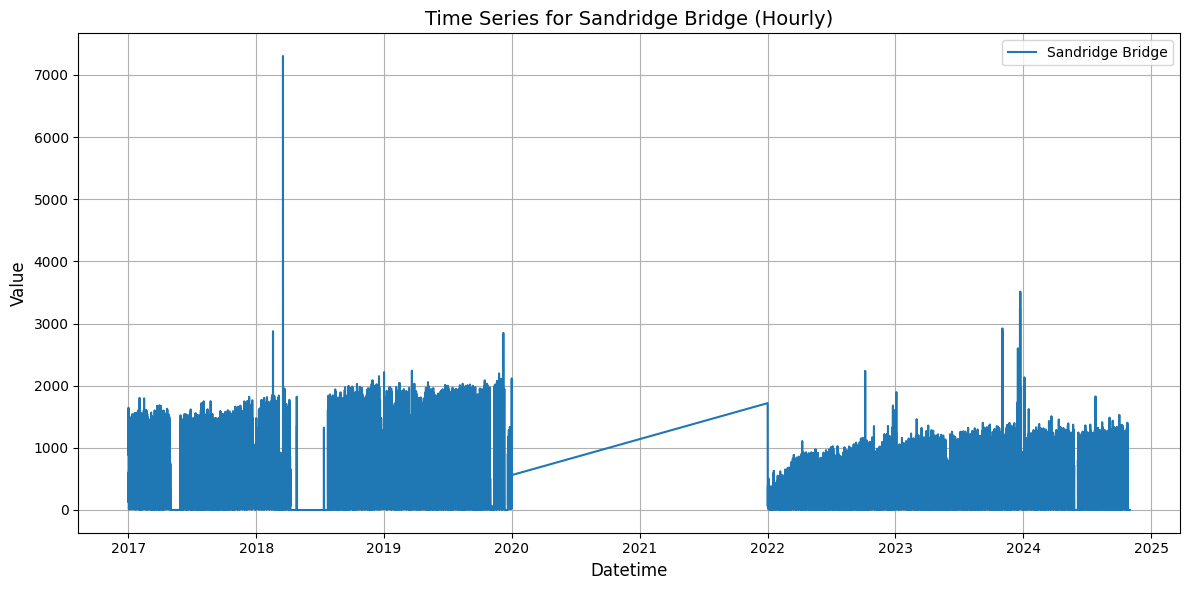

Town Hall (West)


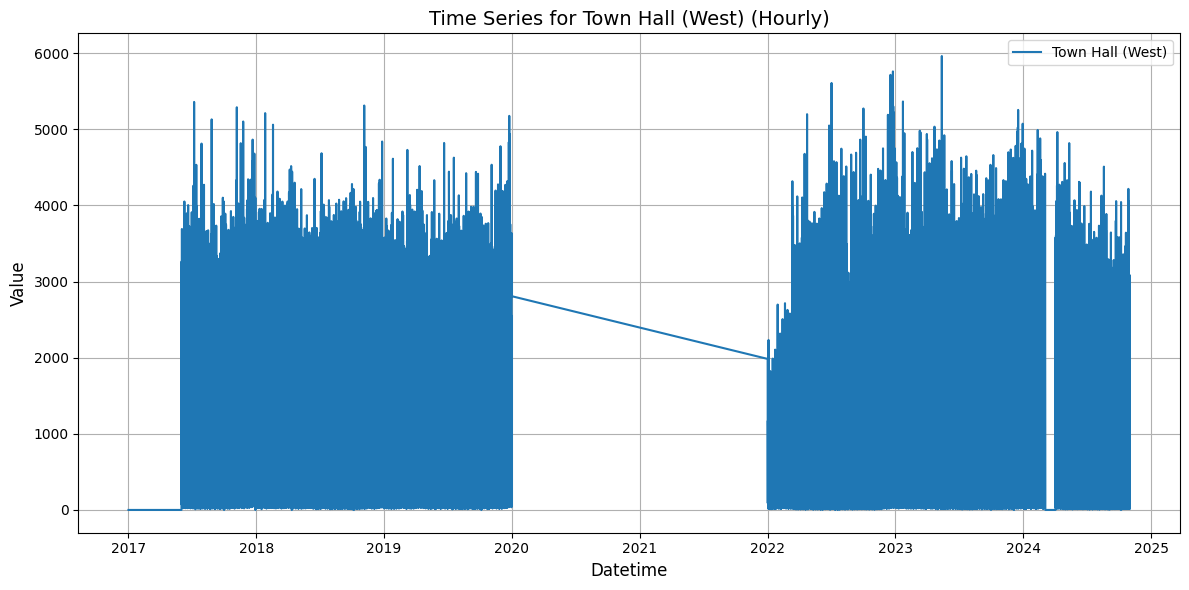

Bourke Street Mall (North)


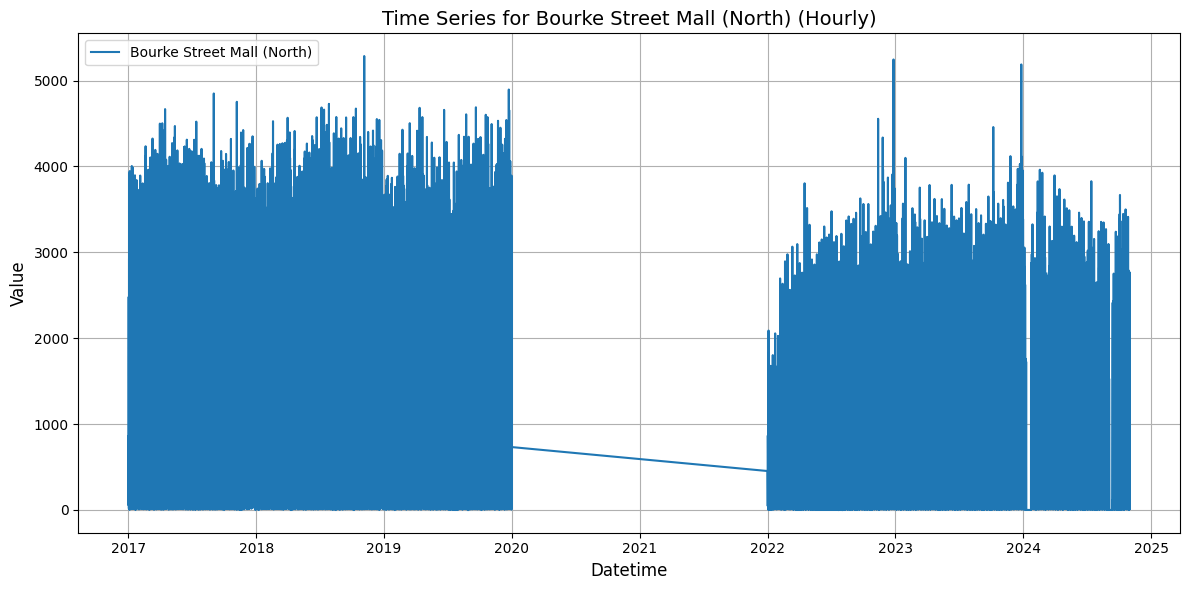

Victoria Point


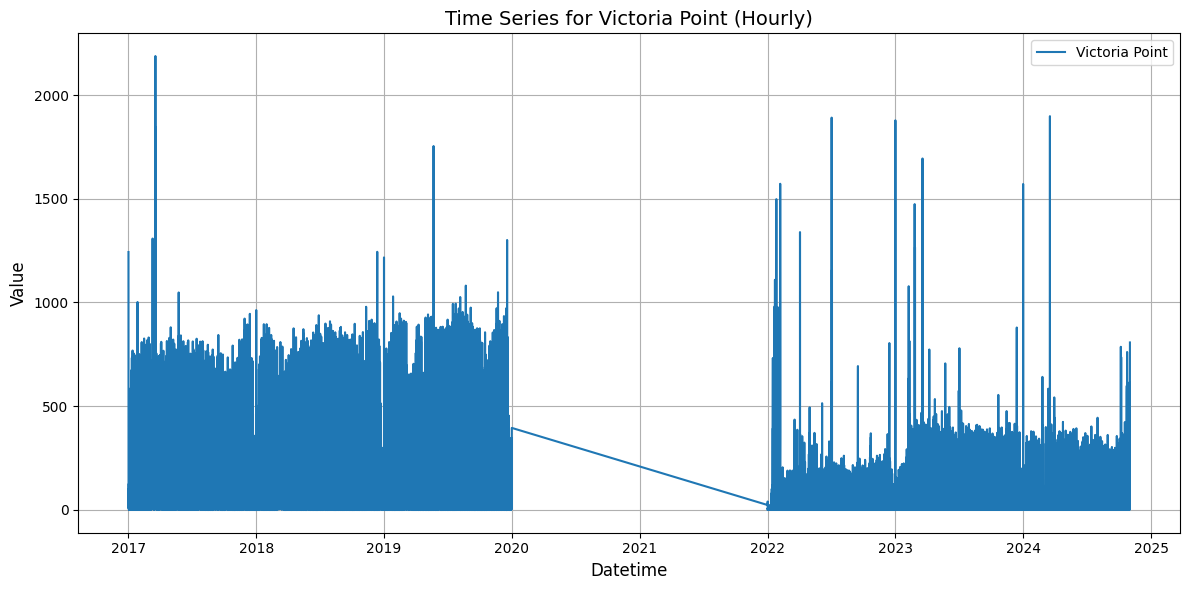

New Quay


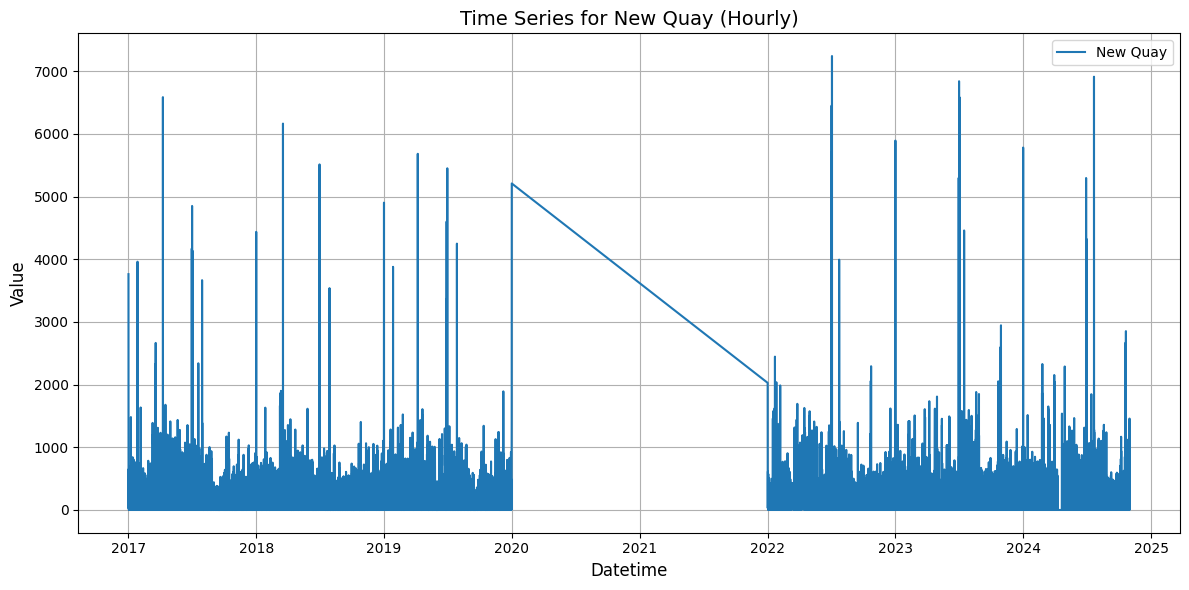

Waterfront City


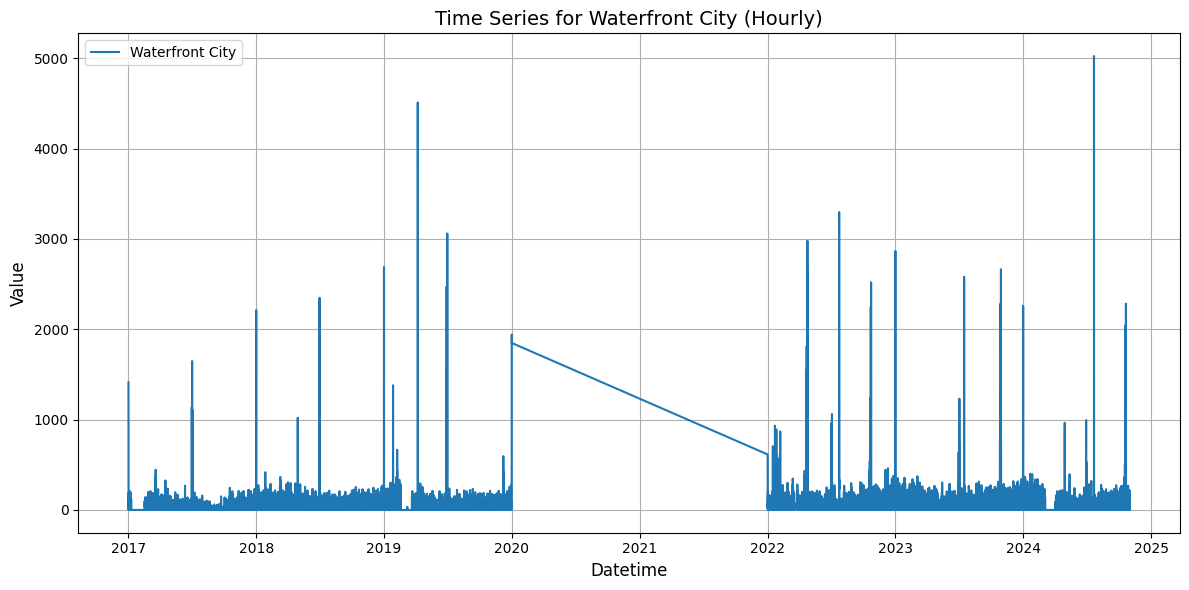

Webb Bridge


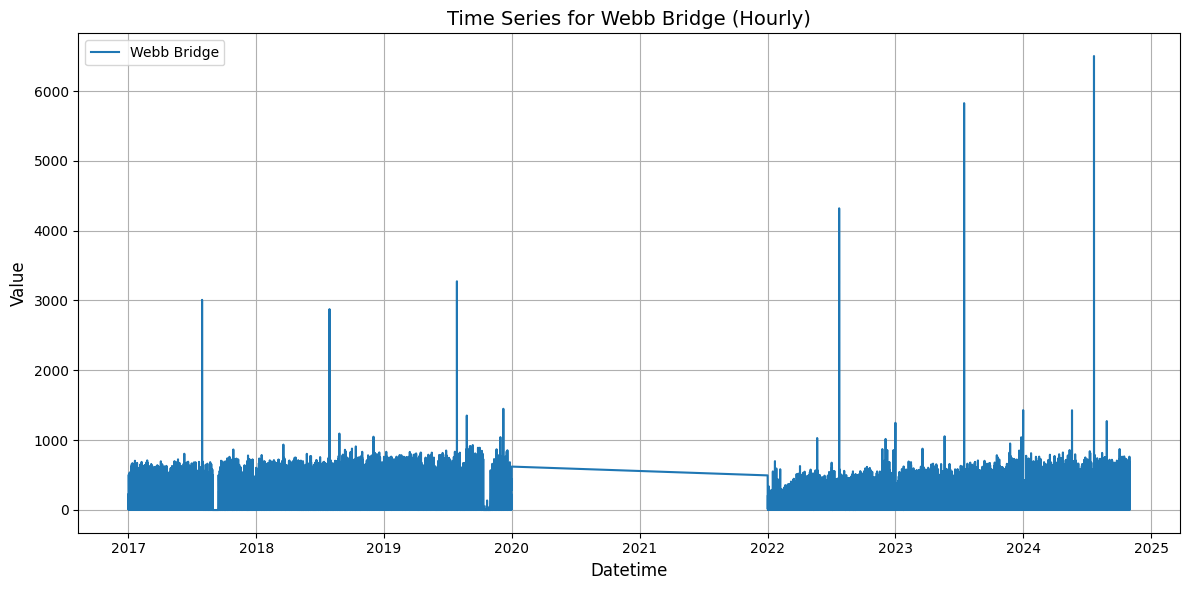

Princes Bridge


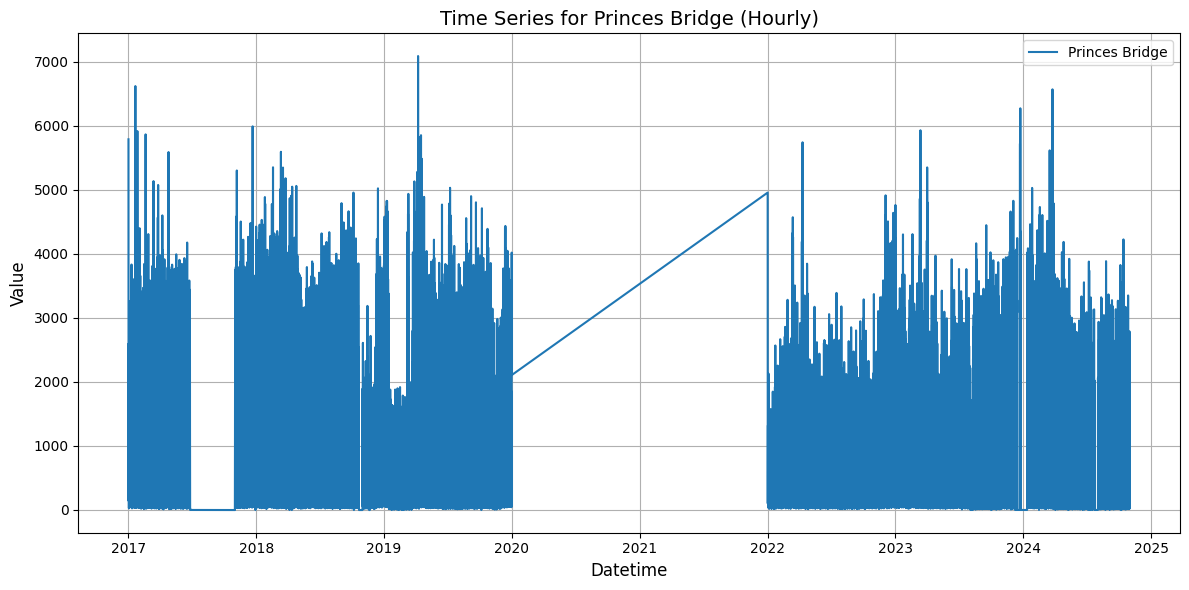

In [13]:
data_folder = '..\\data\\raw'
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = ['2017', '2018', '2019', '2022', '2023', '2024']
import os
import pandas as pd
import matplotlib.pyplot as plt


# Placeholder for combined data
combined_data = pd.DataFrame()

# Load all datasets and combine relevant columns
for year in years:
    for month in months:
        filename = f"{month}_{year}.csv"
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                # Ensure 'Date' and 'Hour' are included
                required_cols = ['Date', 'Hour'] + list_70
                if all(col in df.columns for col in required_cols):
                    filtered_df = df[required_cols].copy()
                    combined_data = pd.concat([combined_data, filtered_df], ignore_index=True)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
        else:
            print(f"{filename} not found")

# Ensure Date and Hour columns are combined into a datetime index
if not combined_data.empty:
    combined_data['Datetime'] = pd.to_datetime(
        combined_data['Date'], format='%d/%m/%Y', errors='coerce'
    ) + pd.to_timedelta(combined_data['Hour'], unit='h')
    combined_data.set_index('Datetime', inplace=True)
    combined_data.sort_index(inplace=True)

    # Clean numeric columns
    for column in list_70_new:
        combined_data[column] = pd.to_numeric(combined_data[column], errors='coerce')

# Plot time series for each column in list_70
for column in list_70_new:
    if column in combined_data.columns:
        print(f"{column}")
        plt.figure(figsize=(12, 6))
        plt.plot(combined_data.index, combined_data[column], label=column)
        plt.title(f"Time Series for {column} (Hourly)", fontsize=14)
        plt.xlabel("Datetime", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column {column} not found in combined data.")

### Checking data

In [18]:
data_folder = '..\\data\\raw'
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = ['2022', '2023', '2024']
import os
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import plotly.graph_objects as go

# Placeholder for combined data
combined_data = pd.DataFrame()

# Load all datasets and combine relevant columns
for year in years:
    for month in months:
        filename = f"{month}_{year}.csv"
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                # Ensure 'Date' and 'Hour' are included
                required_cols = ['Date', 'Hour'] + list_70
                if all(col in df.columns for col in required_cols):
                    filtered_df = df[required_cols].copy()
                    combined_data = pd.concat([combined_data, filtered_df], ignore_index=True)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
        else:
            print(f"{filename} not found")

# Ensure Date and Hour columns are combined into a datetime index
if not combined_data.empty:
    combined_data['Datetime'] = pd.to_datetime(
        combined_data['Date'], format='%d/%m/%Y', errors='coerce'
    ) + pd.to_timedelta(combined_data['Hour'], unit='h')
    combined_data.set_index('Datetime', inplace=True)
    combined_data.sort_index(inplace=True)

    # Clean numeric columns
    for column in list_70_new:
        combined_data[column] = pd.to_numeric(combined_data[column], errors='coerce')

# Create an interactive plot for the selected column
selected_column = 'Melbourne Central'
if selected_column in combined_data.columns:
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=combined_data.index,
        y=combined_data[selected_column],
        mode='lines',
        name=selected_column
    ))
    fig.update_layout(
        title=f"Interactive Time Series for {selected_column} (Hourly)",
        xaxis_title="Datetime",
        yaxis_title="Value",
        hovermode="x unified"
    )
    fig.show()
else:
    print(f"Column {selected_column} not found in combined data.")

November_2024.csv not found
December_2024.csv not found
